# Proyek Akhir Insurance Customer Data -- Oleh Kelompok You NP-Complete Me

Anggota Kelompok:<br>
1. Ravie Hasan Abud - 2206031864 <br>
2. Fikri Dhiya Ramadhana - 2206819533 <br>
3. Adrian Aryaputra Hamzah - 2206811474 <br>
4. Abbilhaidar Farras Zulfikar - 2206026012

# Import Library

In [1]:
%pip install --q dask[dataframe]

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --q catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Basic packages
import pandas as pd
import numpy as np
import datetime
import json
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as scp

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, Binarizer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Metrics
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score,
    classification_report, accuracy_score, f1_score,
    make_scorer, r2_score, mean_absolute_error,
    mean_squared_error, root_mean_squared_error
)

# Modeling - Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Modeling - Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as XGBRegressor

# Boosting
import xgboost as xgb
import lightgbm as lgbm
import catboost as cb

# Clustering packages
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc

# Model selection and evaluation
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, cross_validate, GridSearchCV
from imblearn.pipeline import Pipeline

# Oversampling and undersampling techniques
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN, KMeansSMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

# Dimensionality Reduction / Feature Selection
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Hyperparameter tuning
from scipy.stats import randint, uniform

# Utils
from statistics import mean
from collections import Counter
from numpy import polyfit

# Settings
# import gdown
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
np.random.seed(42)

# Load Datasets

In [4]:
def load_datasets():
  df = pd.read_csv('https://drive.google.com/uc?id=1VW1Gnz7lX15Rcv_TfX5PJgqEz94YOwhK')
  df_test_classif = pd.read_csv('https://drive.google.com/uc?id=1TCX0Br6OqqQrPeQY0Cnw1NjTgSR0mJFd')
  df_test_regress = pd.read_csv('https://drive.google.com/uc?id=1DVogfXS5pf8Df3O2tOvp4PUM4nX8-noA')

  return df, df_test_classif, df_test_regress

df, df_test_classif, df_test_regress = load_datasets()

# Exploratory Data Analysis (EDA)

In [5]:
def desc_stat(col_arr):
  stats = [
      ['Mean', np.mean(col_arr)],
      ['Median', np.median(col_arr)],
      ['Mode', scp.mode(col_arr)[0]],
      ['Standard Deviation', np.std(col_arr)],
      ['Variance', np.var(col_arr)],
      ['Minimum', np.min(col_arr)],
      ['Maximum', np.max(col_arr)],
  ]
  print(pd.DataFrame(stats, columns=['Measure', 'Value']))

In [6]:
res_0 = df[df['Response'] == 0]
res_1 = df[df['Response'] == 1]
prop_names = ['No Response', 'Response']

In [7]:
colors = ['blue', 'brown', 'green', 'yellow', 'red']
def display_overlapping_plot(target_col, dfs=[res_0, res_1], prop_names=prop_names):
  fig = plt.figure(figsize=(12, 10))
  sns.set_style('whitegrid')
  for id, col in enumerate(dfs):
    sns.kdeplot(col[target_col], fill=True, alpha=0.5)
  plt.legend(prop_names, fontsize=12)
  plt.show()

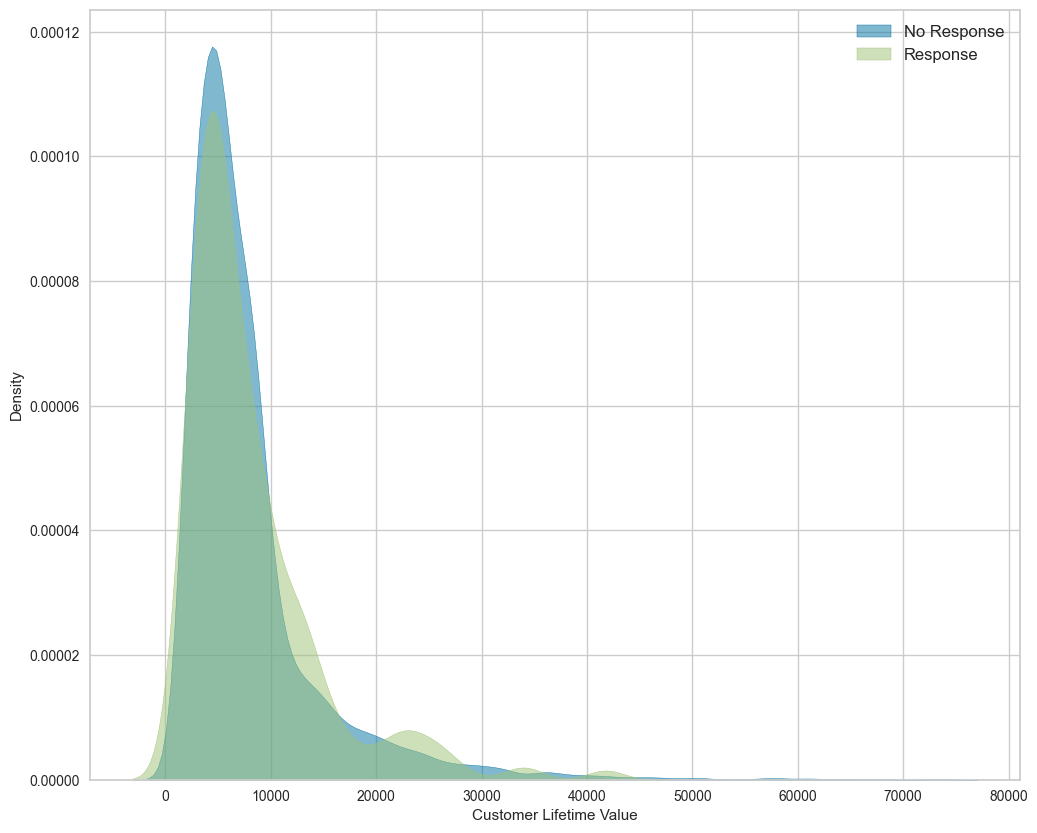

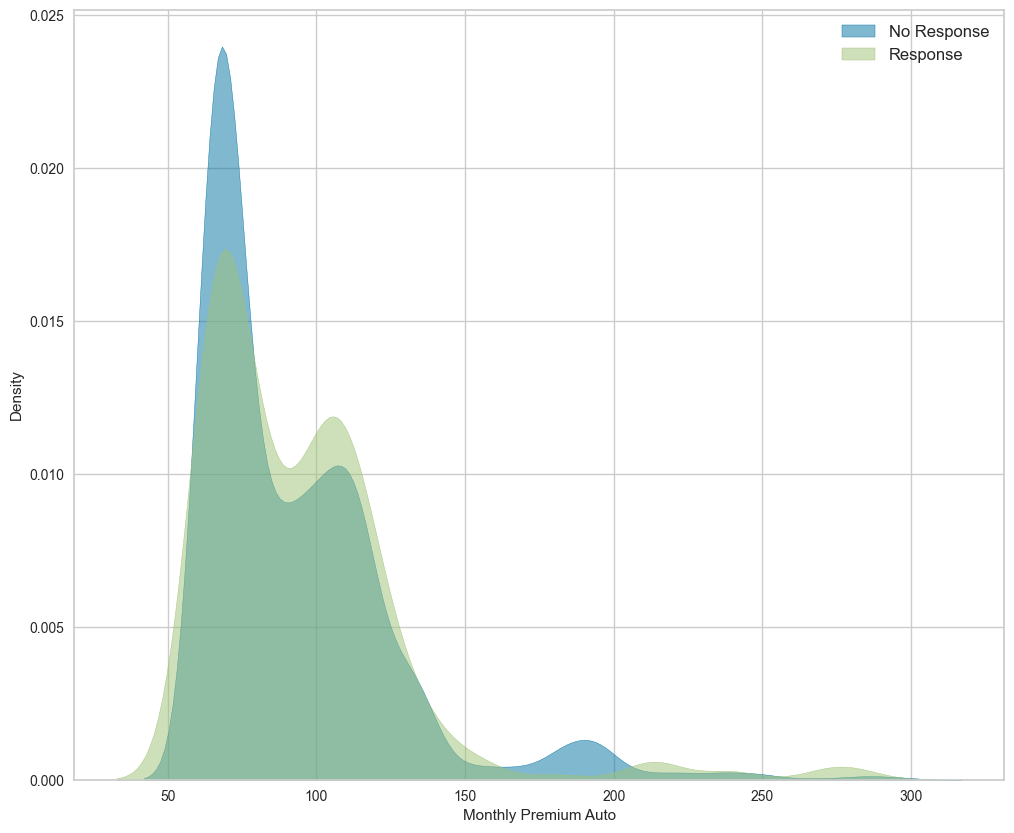

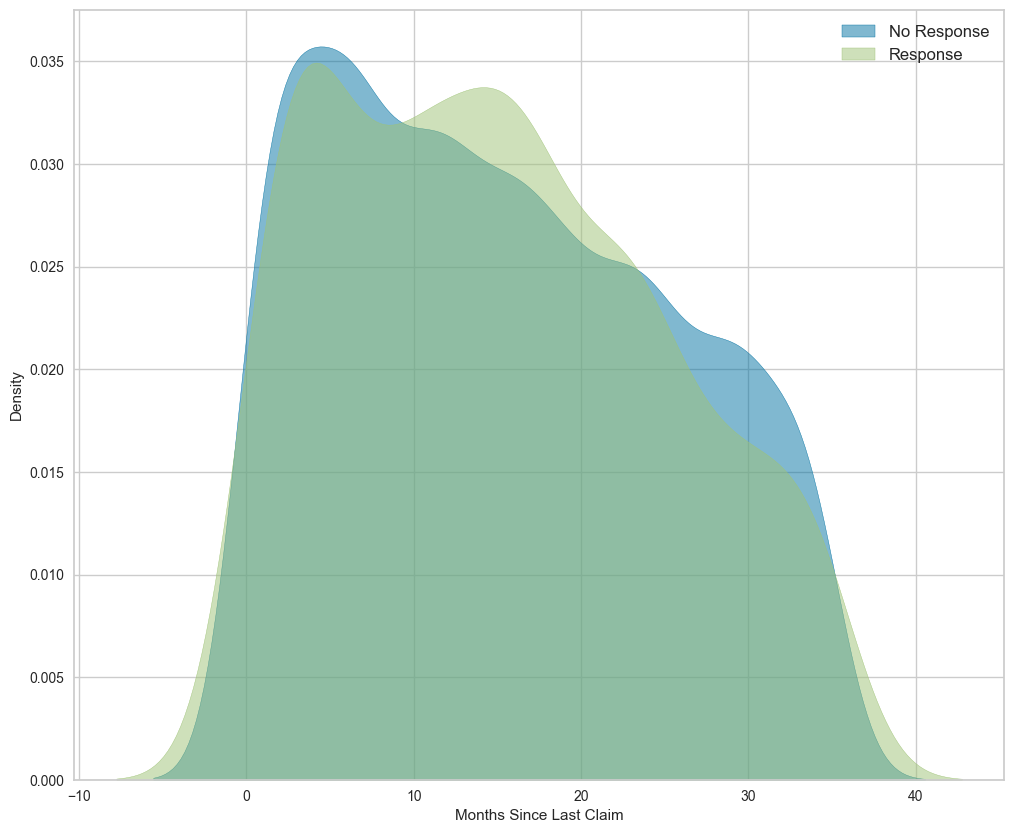

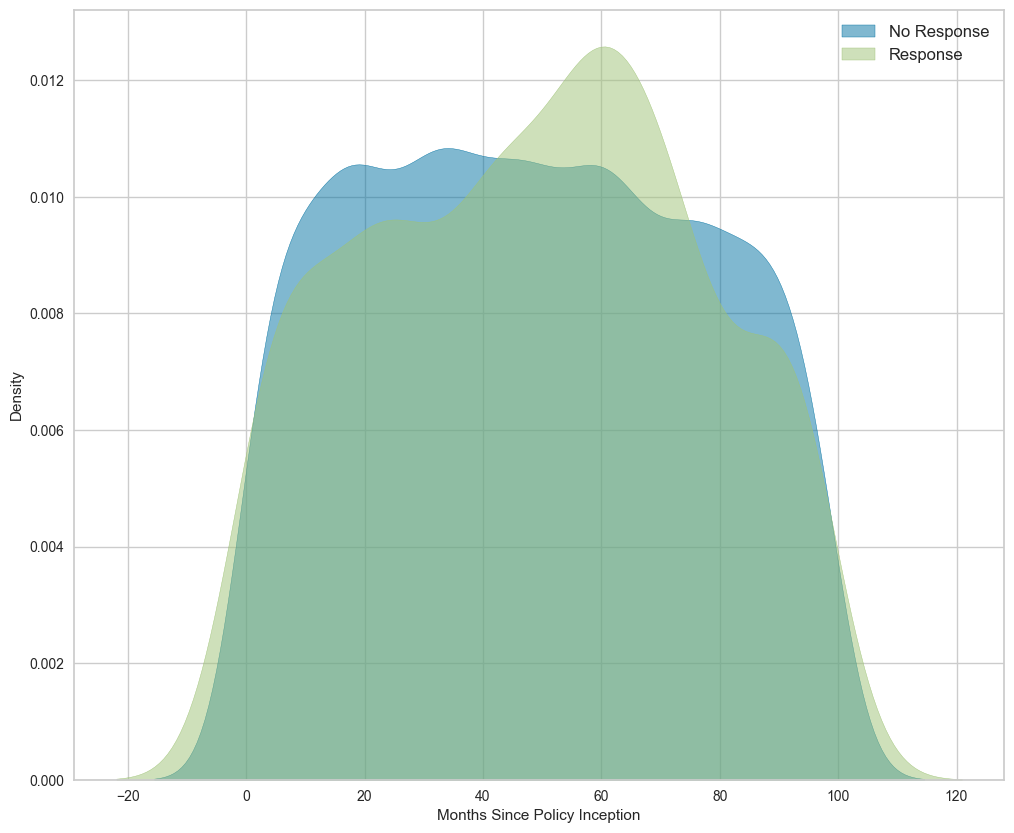

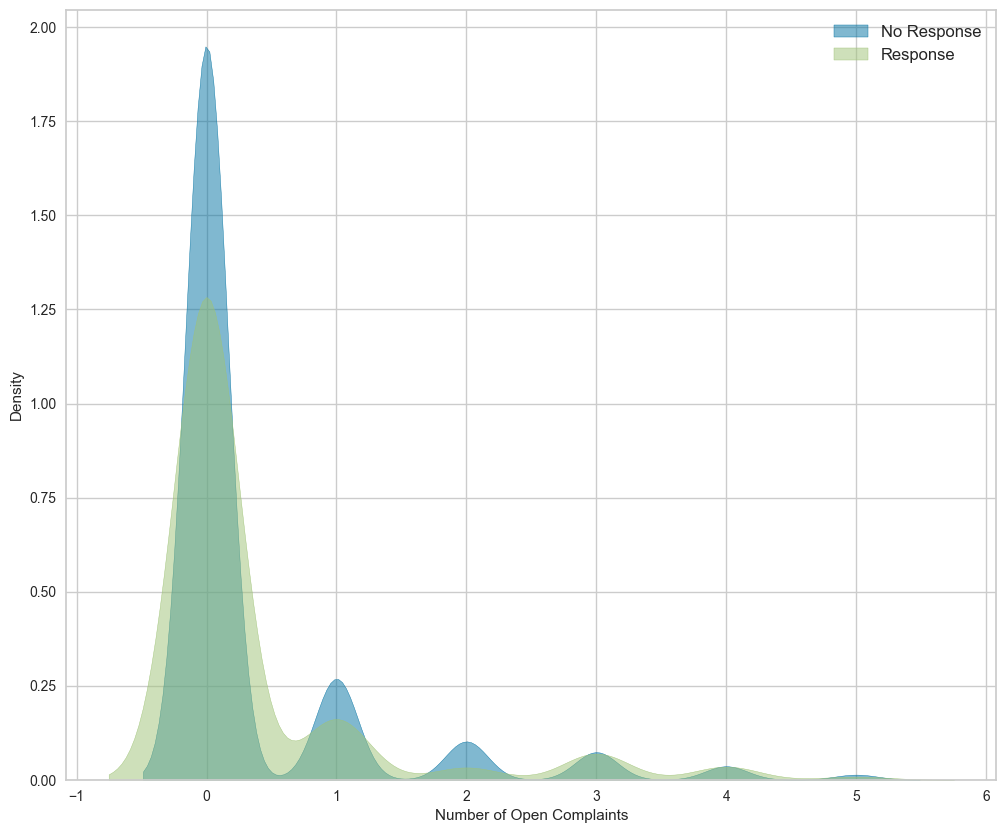

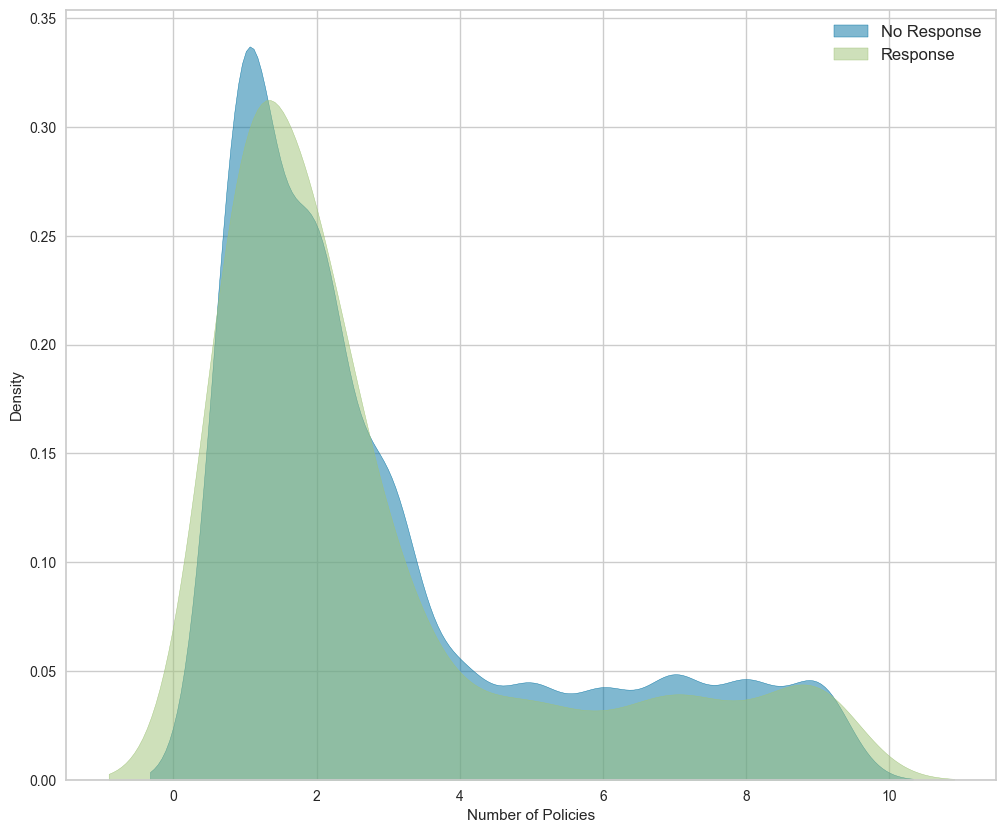

In [8]:
numerical_cols = df.select_dtypes(include=['number'])
numerical_cols = numerical_cols.loc[:, (numerical_cols.isna().sum() == 0) & (numerical_cols.columns != 'Response')].columns.tolist()
numerical_cols

for numerical_col in numerical_cols:
  display_overlapping_plot(numerical_col)


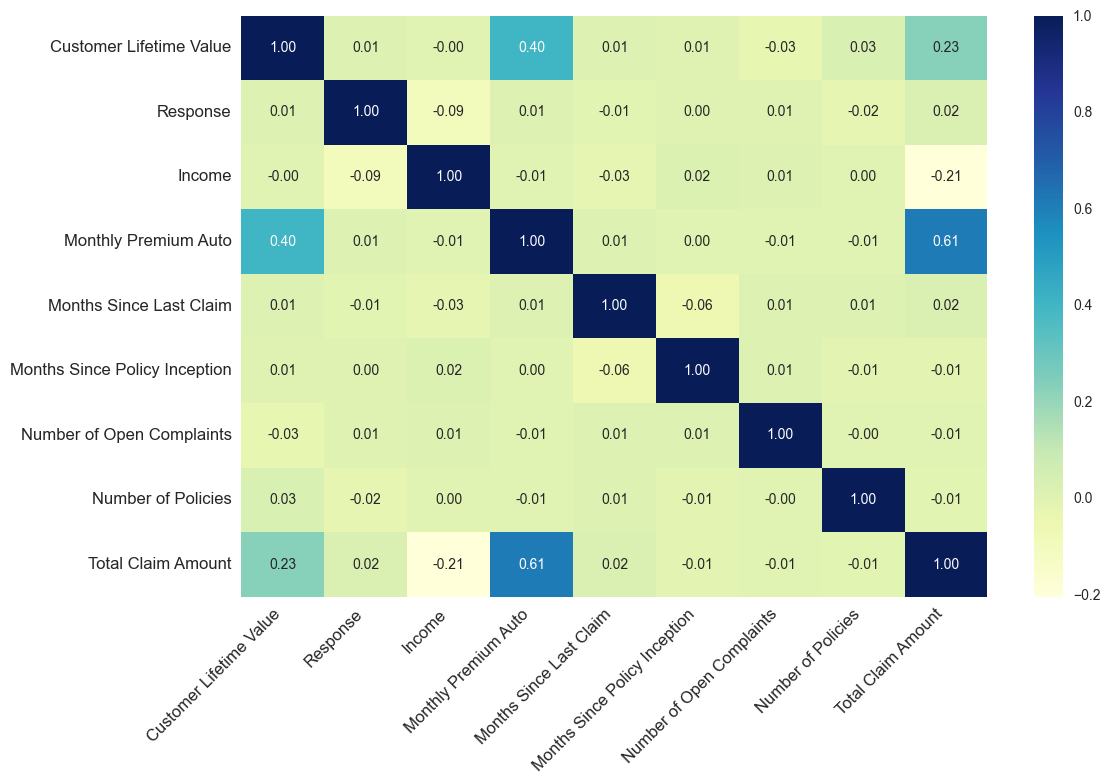

In [9]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))

dataplot = sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 10})

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
desc_stat(df['Income'])

              Measure         Value
0                Mean  5.048096e+04
1              Median           NaN
2                Mode           NaN
3  Standard Deviation  2.429390e+04
4            Variance  5.901936e+08
5             Minimum  1.009700e+04
6             Maximum  9.998100e+04


## Tipe polis mana yang memiliki jumlah klaim rata-rata tertinggi?

In [11]:
average_claims_by_policy_type = df.groupby('Policy Type')['Total Claim Amount'].mean().sort_values(ascending=False)
average_claims_by_policy_type

Policy Type
Personal Auto     433.895320
Special Auto      423.910405
Corporate Auto    417.047638
Name: Total Claim Amount, dtype: float64

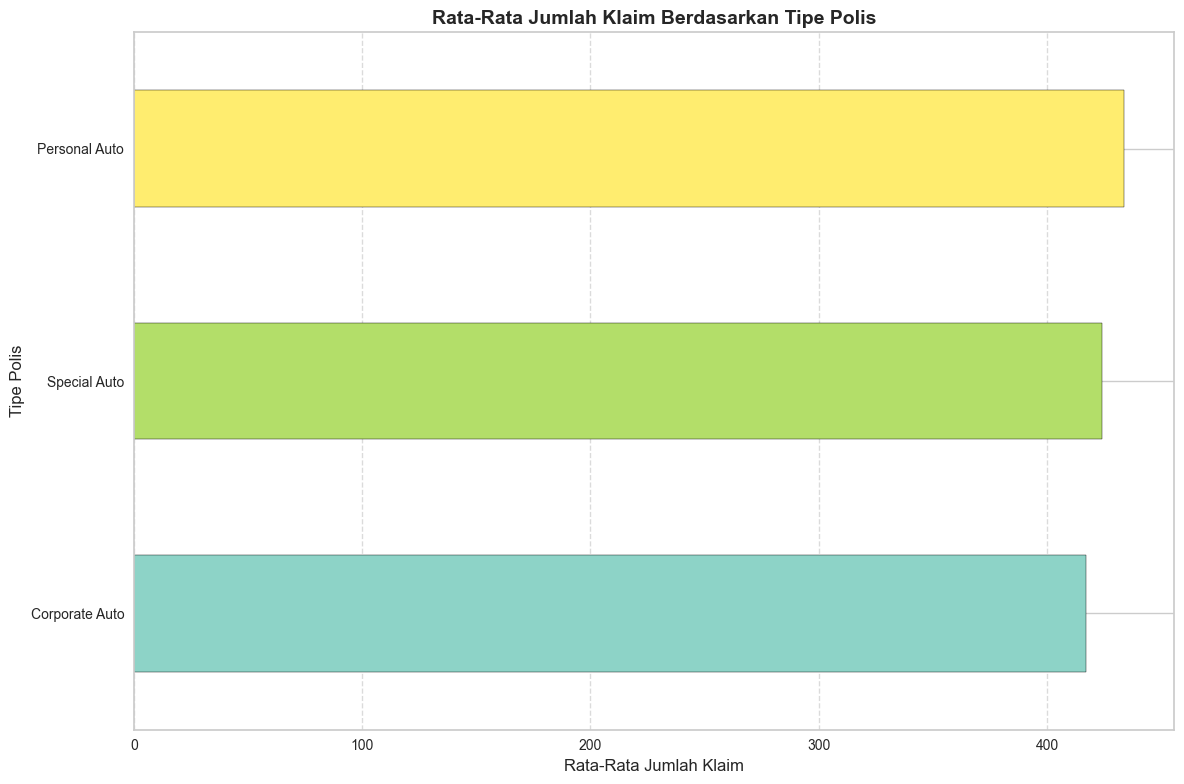

In [12]:
rata_rata_klaim_per_polis = df.groupby('Policy Type')['Total Claim Amount'].mean()

rata_rata_klaim_per_polis = rata_rata_klaim_per_polis.sort_values()
plt.figure(figsize=(12, 8))
rata_rata_klaim_per_polis.plot(kind='barh', color=plt.cm.Set3(np.linspace(0, 1, len(rata_rata_klaim_per_polis))), edgecolor='black')

plt.ylabel('Tipe Polis', fontsize=12)
plt.xlabel('Rata-Rata Jumlah Klaim', fontsize=12)
plt.title('Rata-Rata Jumlah Klaim Berdasarkan Tipe Polis', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Berdasarkan tabel dan hasil visualisasi dengan horizontal bar graph, dapat disimpulkan bahwa tipe polis yang memiliki jumlah klaim rata-rata tertinggi adalah `Personal Auto`. Alasan penggunaan horizontal bar graph adalah karena sifat dari tipe polis yang nominal (tidak ada ordering), sedangkan vertical bar graph secara implisit menyatakan bahwa ada ordering.

## Coverage apa yang paling banyak dimiliki oleh pengguna yang berstatus pekerjaan “Unemployed”

<Figure size 1400x800 with 0 Axes>

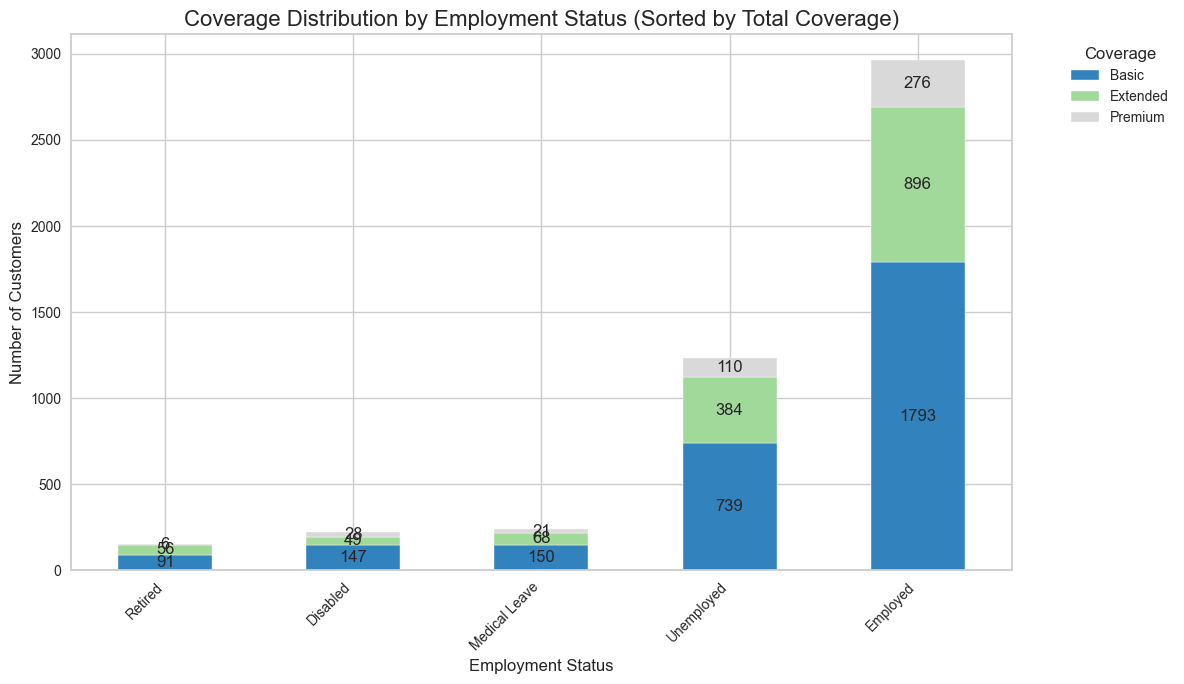

In [13]:
import matplotlib.pyplot as plt

coverage_by_employment = df.groupby(['EmploymentStatus', 'Coverage'])['Customer'].count().unstack().fillna(0)

coverage_by_employment = coverage_by_employment.loc[coverage_by_employment.sum(axis=1).sort_values().index]

plt.figure(figsize=(14, 8))
ax = coverage_by_employment.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(12, 7))

plt.title('Coverage Distribution by Employment Status (Sorted by Total Coverage)', fontsize=16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.legend(title='Coverage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


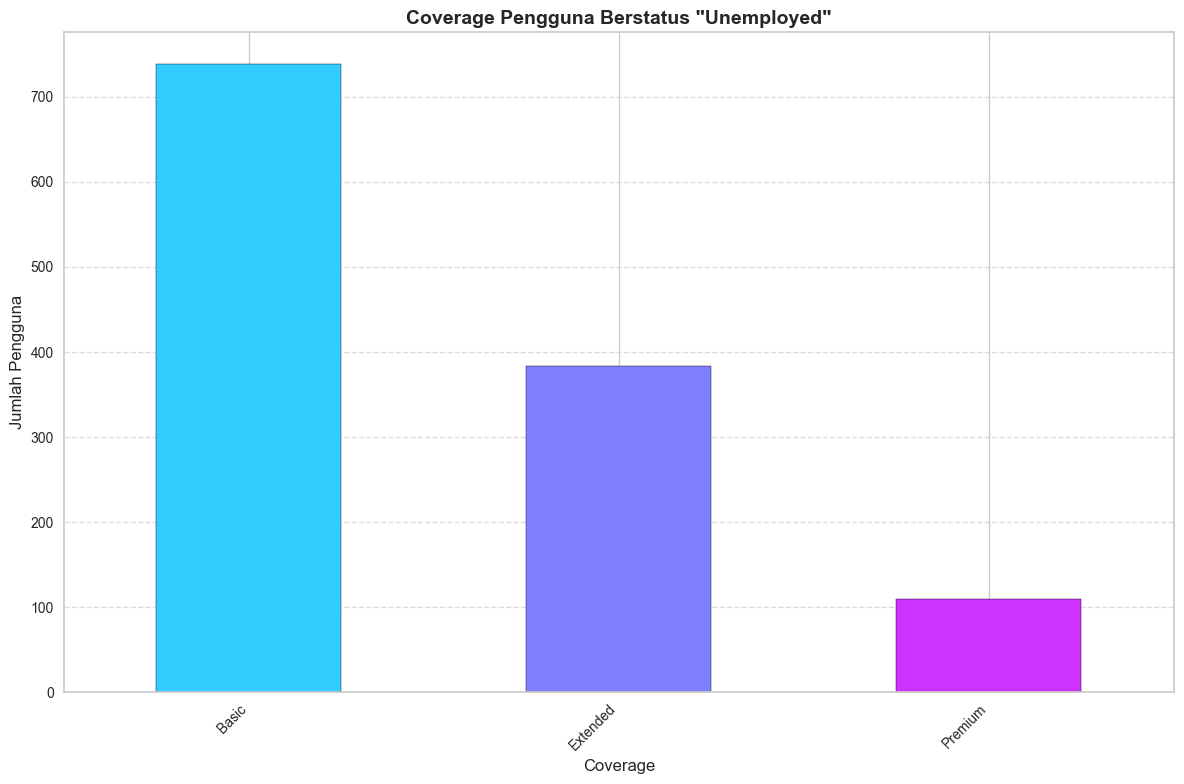

In [14]:
pengguna_pengangguran = df[df['EmploymentStatus'] == 'Unemployed']

jumlah_coverage = pengguna_pengangguran['Coverage'].value_counts()

plt.figure(figsize=(12, 8))
jumlah_coverage.plot(kind='bar', color=plt.cm.cool(np.linspace(0.2, 0.8, len(jumlah_coverage))), edgecolor='black')

plt.title('Coverage Pengguna Berstatus "Unemployed"', fontsize=14, fontweight='bold')
plt.xlabel('Coverage', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Bagaimana hubungan antara Monthly Premium Auto dengan Customer Lifetime Value dan Monthly Premium Auto dengan Coverage?

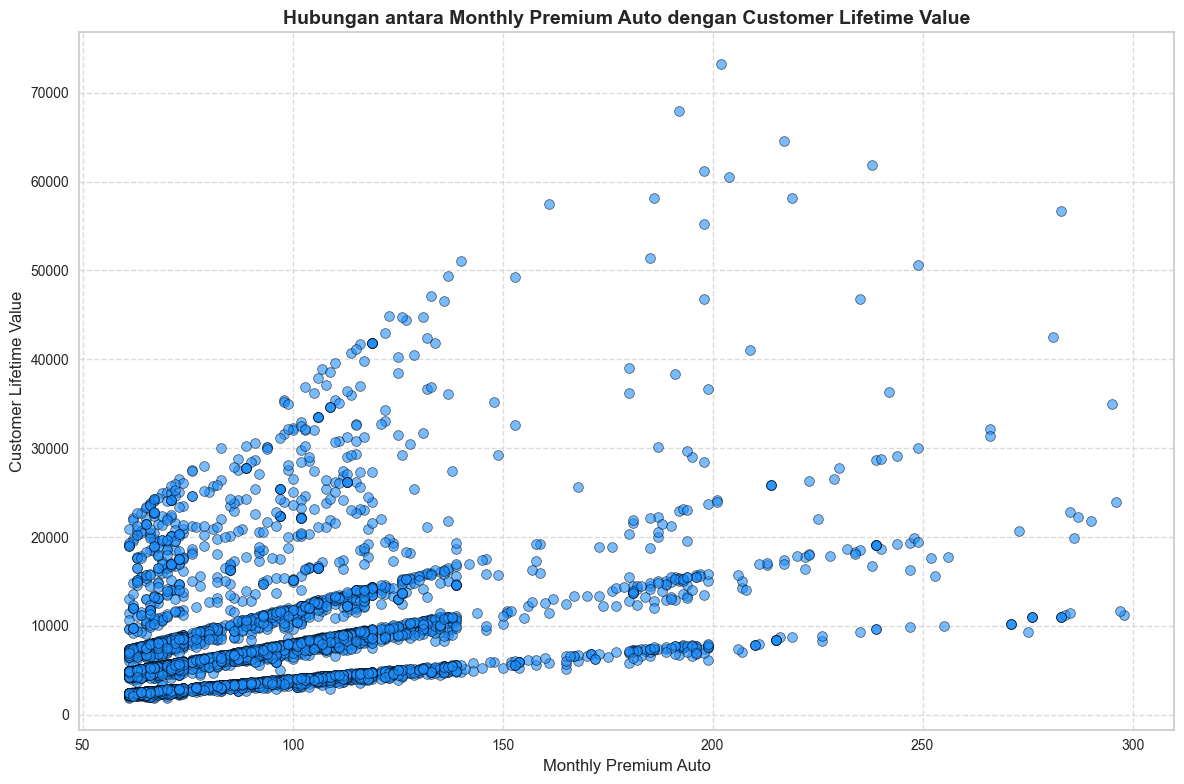

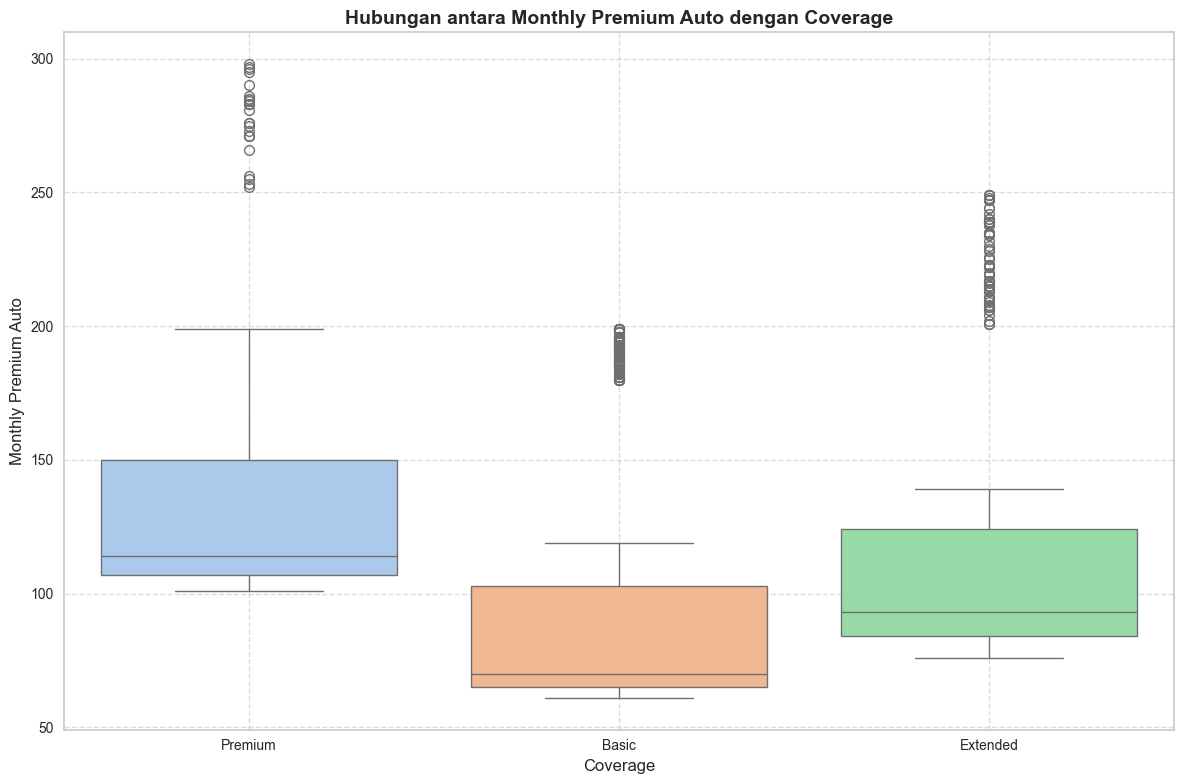

Korelasi antara Monthly Premium Auto dan Customer Lifetime Value: 0.4016859456870917


In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Monthly Premium Auto', y='Customer Lifetime Value', data=df, color='dodgerblue', alpha=0.6, edgecolor='black')
plt.title('Hubungan antara Monthly Premium Auto dengan Customer Lifetime Value', fontsize=14, fontweight='bold')
plt.xlabel('Monthly Premium Auto', fontsize=12)
plt.ylabel('Customer Lifetime Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Coverage', y='Monthly Premium Auto', data=df, hue='Coverage', palette='pastel', dodge=False)
plt.title('Hubungan antara Monthly Premium Auto dengan Coverage', fontsize=14, fontweight='bold')
plt.xlabel('Coverage', fontsize=12)
plt.ylabel('Monthly Premium Auto', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

korelasi = df['Monthly Premium Auto'].corr(df['Customer Lifetime Value'])
print(f"Korelasi antara Monthly Premium Auto dan Customer Lifetime Value: {korelasi}")


## Apakah pelanggan dengan coverage 'Premium' cenderung memiliki Customer Lifetime Value yang lebih tinggi dibandingkan dengan mereka yang memiliki coverage 'Basic' atau 'Extended'?

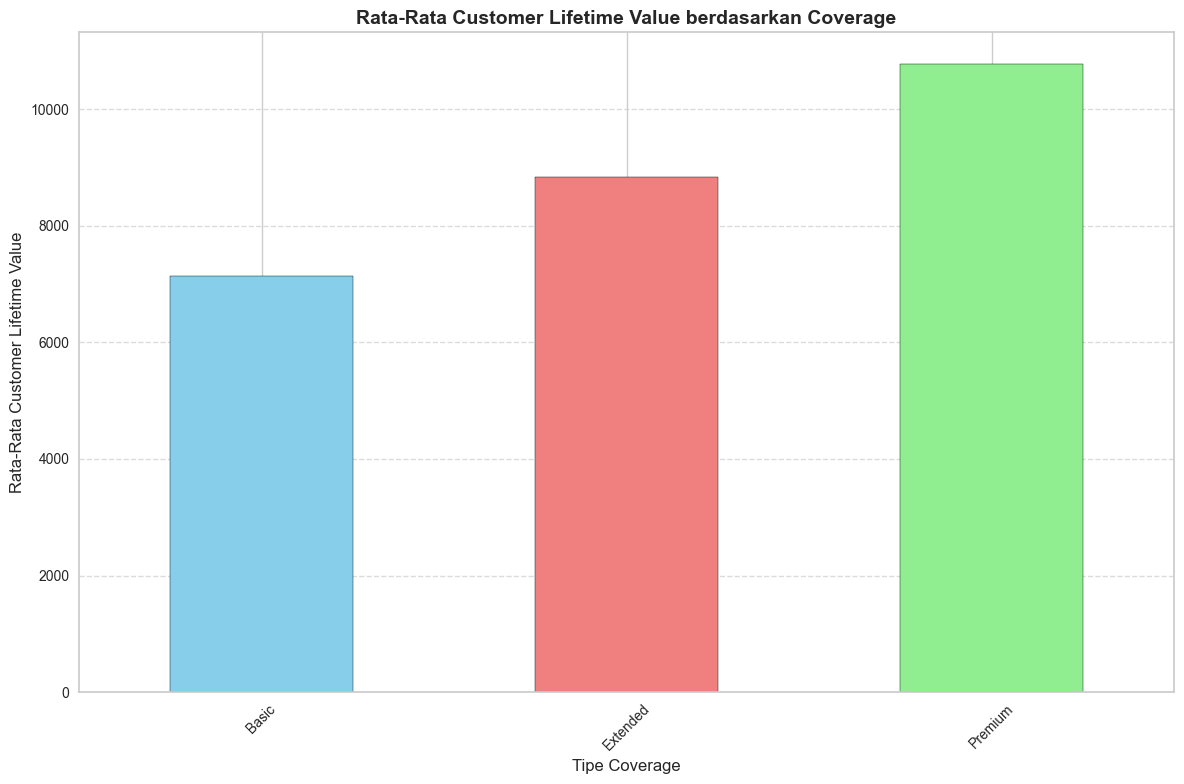

In [16]:
rata_rata_clv_per_coverage = df.groupby('Coverage')['Customer Lifetime Value'].mean()

plt.figure(figsize=(12, 8))
rata_rata_clv_per_coverage.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black')

plt.xlabel('Tipe Coverage', fontsize=12)
plt.ylabel('Rata-Rata Customer Lifetime Value', fontsize=12)
plt.title('Rata-Rata Customer Lifetime Value berdasarkan Coverage', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Berdasarkan tabel dan hasil visualisasi dengan bar graph, jelas bahwa pelanggan dengan jenis coverage `Premium` cenderung memiliki `Customer Lifetime Value` yang lebih tinggi dibandingkan dengan pelanggan dengan jenis coverage lainnya. Alasan penggunaan bar graph vertikal adalah karena memang kolom Coverage sifatnya ordinal (ada ordering-nya, dimulai dari Basic, Extended, setelah itu Premium).

## Hubungan antara `Total Claim Amount` dan `Renew Offer Type`

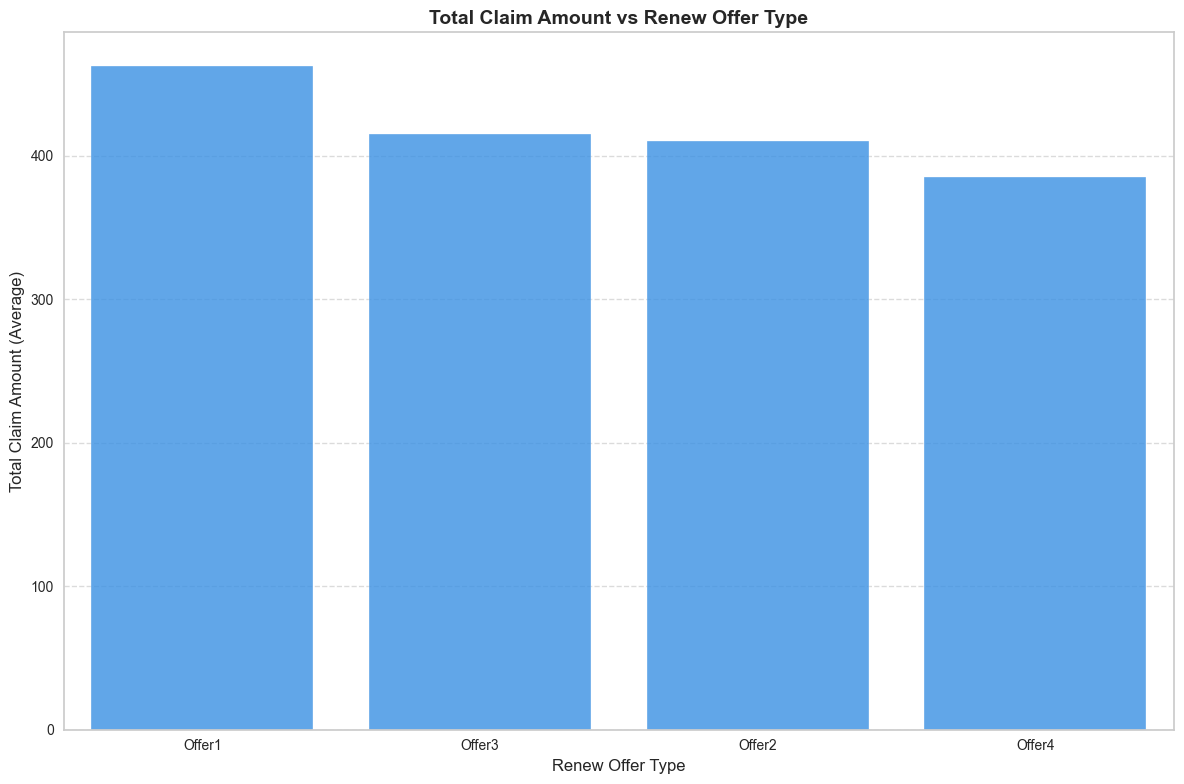

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Renew Offer Type', y='Total Claim Amount', data=df, ci=None, color='dodgerblue', alpha=0.8)
plt.title('Total Claim Amount vs Renew Offer Type', fontsize=14, fontweight='bold')
plt.xlabel('Renew Offer Type', fontsize=12)
plt.ylabel('Total Claim Amount (Average)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Terlihat bahwa terdapat rata-rata Total Claim Amount pada `Offer1` lebih besar daripada `Offer2` dan `Offer3`, sedangkan rata-rata Total Claim Amount pada `Offer2` dan `Offer3` lebih besar daripada `Offer4`. Secara umum, dapat dikatakan bahwa semakin besar jumlah `Total Claim Amount`, maka jenis penawaran perpanjangan akan semakin 'kecil'. Hal ini disebabkan karena secara umum, pelanggan dengan `Total Claim Amount` yang rendah lebih memungkinkan untuk mendapatkan penawaran perpanjangan yang lebih menguntungkan (`Renew Offer Type`). Pada sisi lain, pelanggan dengan `Total Claim Amount` tinggi akan memerlukan penyesuaian dalam `Renew Offer Type`.

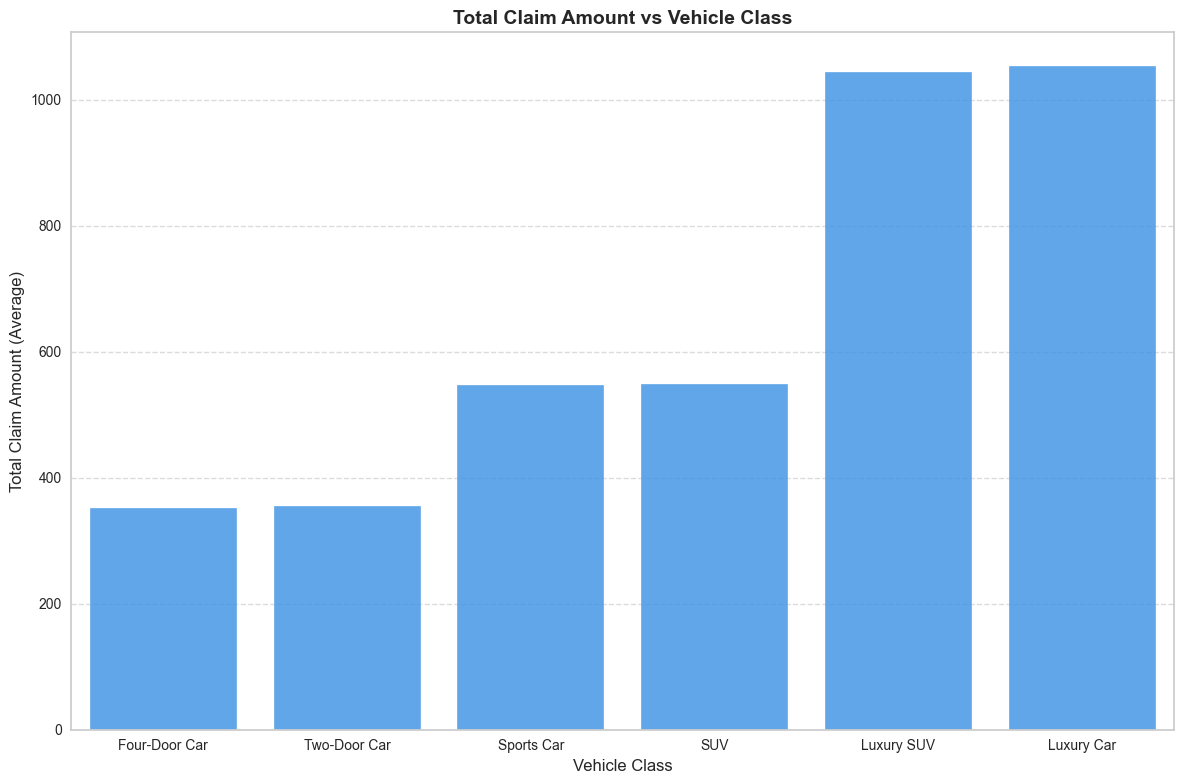

In [18]:
sorted_classes = df.groupby('Vehicle Class')['Total Claim Amount'].mean().sort_values().index

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Vehicle Class',
    y='Total Claim Amount',
    data=df,
    ci=None,
    color='dodgerblue',
    alpha=0.8,
    order=sorted_classes
)
plt.title('Total Claim Amount vs Vehicle Class', fontsize=14, fontweight='bold')
plt.xlabel('Vehicle Class', fontsize=12)
plt.ylabel('Total Claim Amount (Average)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Terlihat bahwa rata-rata Total Claim Amount pada kendaraan mewah seperti `Luxury Car` dan `Luxury SUV` lebih besar dibandingkan dengan kategori lainnya. Pada sisi lain, rata-rata Total Claim Amount pada kendaraan `Sports Car` dan `SUV` lebih besar dibandingkan kendaraan umum seperti `Four-Door Car` dan `Two-Door Car`. Secara umum, dapat dikatakan bahwa semakin tinggi nilai atau risiko pada kendaraan, maka semakin besar pula rata-rata klaim asuransi yang diajukan. Hal ini disebabkan karena kendaraan mewah atau kendaranan dengan resiko besar memiliki biaya perbaikan yang lebih tinggi, sementara kendaraan "umum" cenderung memiliki biaya perbaikan lebih rendah sehingga klaimnya juga lebih kecil.

# Classification

## Preprocessing

In [19]:
df, df_test_classif, _ = load_datasets()

In [20]:
# Drop identifier (ID)
df = df.drop(columns=['Customer'])
customer_classif = df_test_classif['Customer']
df_test_classif = df_test_classif.drop(columns=['Customer'])

In [21]:
# Describe fitur numerik
df.describe()

Customer Lifetime Value     Response        Income  \
count              5480.000000  5480.000000   4076.000000   
mean               8001.630793     0.142336  50480.955839   
std                6854.186470     0.349426  24296.881547   
min                1898.007675     0.000000  10097.000000   
25%                4016.927113     0.000000  28432.000000   
50%                5801.478197     0.000000  48113.500000   
75%                8947.875574     0.000000  70083.500000   
max               73225.956520     1.000000  99981.000000   

       Monthly Premium Auto  Months Since Last Claim  \
count           5480.000000              5480.000000   
mean              93.479927                15.225365   
std               34.629333                10.029712   
min               61.000000                 0.000000   
25%               69.000000                 6.000000   
50%               83.000000                14.000000   
75%              109.000000                23.000000   
max              298.000000                35.000000   

       Months Since Policy Inception  Number of Open Complaints  \
count                    5480.000000                5480.000000   
mean                       48.119891                   0.371898   
std                        28.020285                   0.894720   
min                         0.000000                   0.000000   
25%                        24.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        71.000000                   0.000000   
max                        99.000000                   5.000000   

       Number of Policies  Total Claim Amount  
count         5480.000000         4563.000000  
mean             2.970255          429.914629  
std              2.400955          283.011212  
min              1.000000            0.423310  
25%              1.000000          267.979586  
50%              2.000000          379.200000  
75%              4.000000          542.400000  
max              9.000000         2452.894264

In [22]:
# Describe fitur kategorikal
df.describe(include='object')

State Coverage Education Effective To Date EmploymentStatus  \
count         5480     4814      5480              5480             5480   
unique           5        3         5                59                5   
top     California    Basic  Bachelor           1/31/11         Employed   
freq          1905     2920      1656               116             3398   

       Gender Location Code Marital Status    Policy Type       Policy  \
count    5480          5480           5480           5480         5480   
unique      2             3              3              3            9   
top         F      Suburban        Married  Personal Auto  Personal L3   
freq     2821          3462           3197           4095         2060   

       Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
count              5480          5480           5480         5480  
unique                4             4              6            3  
top              Offer1         Agent  Four-Door Car      Medsize  
freq               2241          2016           2728         3825

### Missing Values

In [23]:
# Analyze proporsi missing values pada setiap fitur
missing_values_info = []
for col in df:
    missing = df[col].isna().sum()
    missing_values_info.append([col, missing, (missing/len(df))*100])

indexOutput = list(range(0, len(missing_values_info)))
pd.DataFrame(missing_values_info, columns=['Column', '# Missing','Persentase'], index=indexOutput).sort_values(by=['Persentase'], ascending=False, ignore_index=True)

Column  # Missing  Persentase
0                          Income       1404   25.620438
1              Total Claim Amount        917   16.733577
2                        Coverage        666   12.153285
3                           State          0    0.000000
4   Months Since Policy Inception          0    0.000000
5                   Vehicle Class          0    0.000000
6                   Sales Channel          0    0.000000
7                Renew Offer Type          0    0.000000
8                          Policy          0    0.000000
9                     Policy Type          0    0.000000
10             Number of Policies          0    0.000000
11      Number of Open Complaints          0    0.000000
12           Monthly Premium Auto          0    0.000000
13        Months Since Last Claim          0    0.000000
14        Customer Lifetime Value          0    0.000000
15                 Marital Status          0    0.000000
16                  Location Code          0    0.000000
17                         Gender          0    0.000000
18               EmploymentStatus          0    0.000000
19              Effective To Date          0    0.000000
20                      Education          0    0.000000
21                       Response          0    0.000000
22                   Vehicle Size          0    0.000000

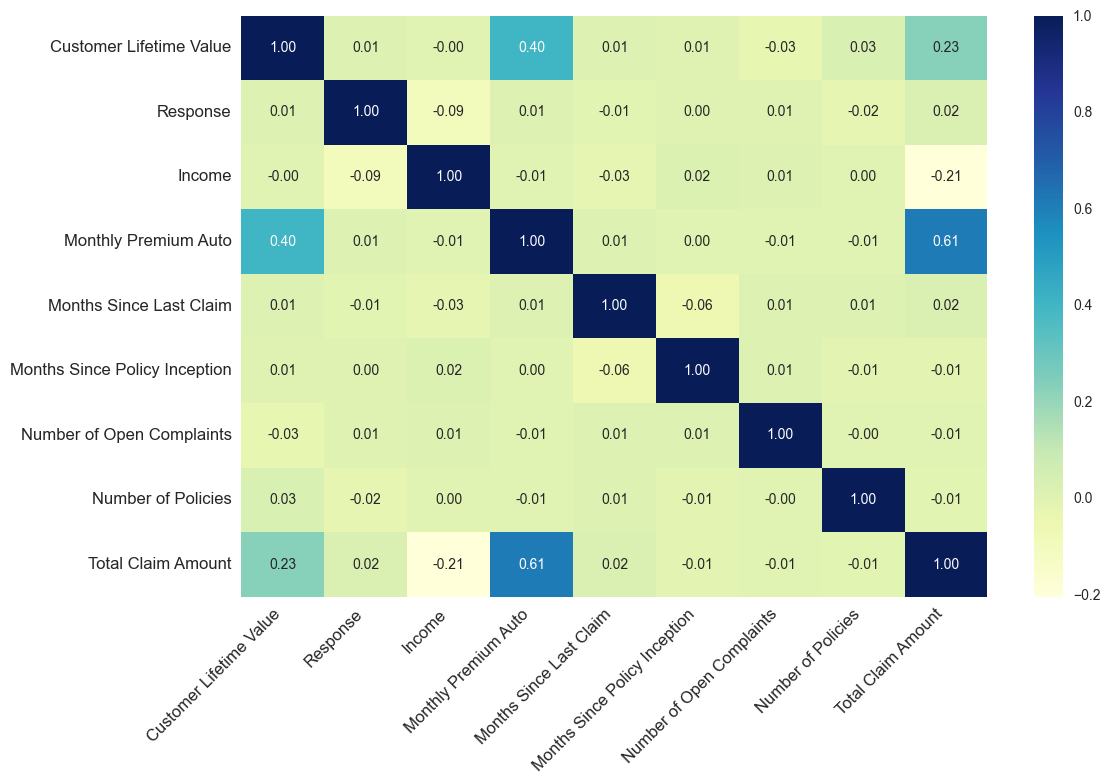

In [24]:
# Melihat korelasi antar fitur untuk pertimbangan handling missing values
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))

dataplot = sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 10})

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

Karena income sudah berkorelasi tinggi dengan `Monthly Premium Auto`, maka kita bisa drop fitur `Income`.  
Selain itu, untuk kasus:
- Klasifikasi: korelasi antara `Response` dengan `Income` = 0.09 (cukup rendah)
- Regresi: korelasi antara `CLV` dengan `Income` = 0

In [25]:
df = df.drop(columns=['Income'])
df_test_classif = df_test_classif.drop(columns=['Income'])

Di sisi lain, untuk Fitur `Total Claim Amount` dan `Coverage`, proporsi missing value masih bisa ditoleransi. Dengan demikian, akan dilakukan imputasi.

In [26]:
df['Total Claim Amount'].describe()

count    4563.000000
mean      429.914629
std       283.011212
min         0.423310
25%       267.979586
50%       379.200000
75%       542.400000
max      2452.894264
Name: Total Claim Amount, dtype: float64

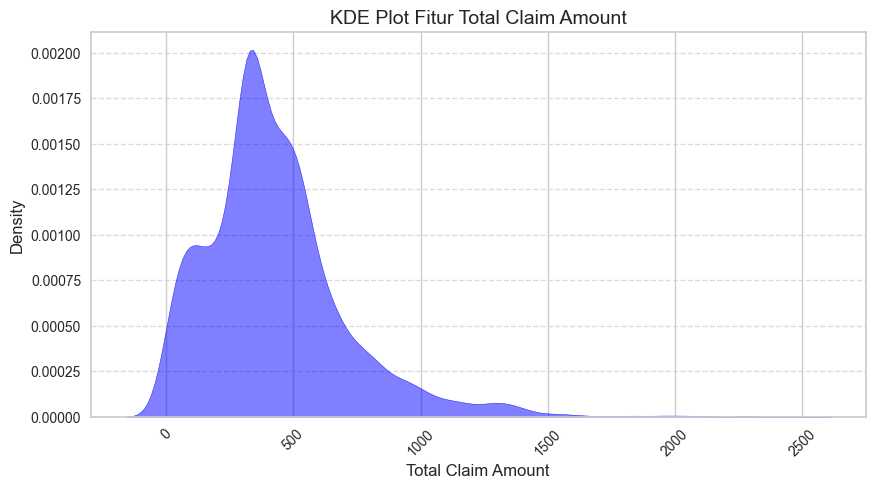

In [27]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Total Claim Amount', fill=True, color='blue', alpha=0.5)
plt.title(f'KDE Plot Fitur Total Claim Amount', fontsize=14)
plt.xlabel('Total Claim Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan informasi di atas (descriptive statistics dan plot), jelas bahwa fitur `Total Claim Amount` tidak terdistribusi secara normal. Dengan demikian imputasi dilakukan menggunakan median.

In [28]:
# Imputasi Fitur Total Claim Amount (numerik) dengan Median
median_imputer = SimpleImputer(strategy='median')
df['Total Claim Amount'] = median_imputer.fit_transform(df[['Total Claim Amount']]).ravel()
median_imputer = SimpleImputer(strategy='median')
df_test_classif['Total Claim Amount'] = median_imputer.fit_transform(df_test_classif[['Total Claim Amount']]).ravel()

Kemudian, karena fitur `Coverage` bersifat kategorikal, maka imputasi dilakukan dengan mode.

In [29]:
# Imputasi Fitur Coverage (kategorikal) dengan Mode
mode_imputer = SimpleImputer(strategy='most_frequent')
df['Coverage'] = mode_imputer.fit_transform(df[['Coverage']]).ravel()
mode_imputer = SimpleImputer(strategy='most_frequent')
df_test_classif['Coverage'] = mode_imputer.fit_transform(df_test_classif[['Coverage']]).ravel()

### Duplication

In [30]:
# Melihat banyaknya duplicated examples
print(f"Banyaknya baris duplikat: {df.duplicated().sum()}")

Banyaknya baris duplikat: 33


Berhubung examples yang hanya merupakan duplikat kemungkinan besar tidak akan memberikan informasi baru, maka akan di-drop.

In [31]:
# Drop examples yang merupakan duplikat
df = df.drop_duplicates()
print(f"Banyaknya baris duplikat: {df.duplicated().sum()}")

Banyaknya baris duplikat: 0


### Outliers

In [32]:
# Simpan fitur numerik
numerical_columns = df.select_dtypes(np.number).columns.tolist()
numerical_columns.remove('Response')

In [33]:
# Lihat proporsi outliers
outliers_info = []

Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

for col in df[numerical_columns]:
    outliers = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    outliers_info.append([col, outliers, (outliers/len(df))*100])

indexOutput = list(range(0, len(outliers_info)))

pd.DataFrame(outliers_info, columns=['Column', '# Outlier', 'Persentase'],index=indexOutput).sort_values(by=['Persentase'], ascending = False,ignore_index=True)

Column  # Outlier  Persentase
0      Number of Open Complaints       1096   20.121168
1        Customer Lifetime Value        490    8.995777
2             Total Claim Amount        375    6.884524
3             Number of Policies        262    4.809987
4           Monthly Premium Auto        260    4.773270
5        Months Since Last Claim          0    0.000000
6  Months Since Policy Inception          0    0.000000

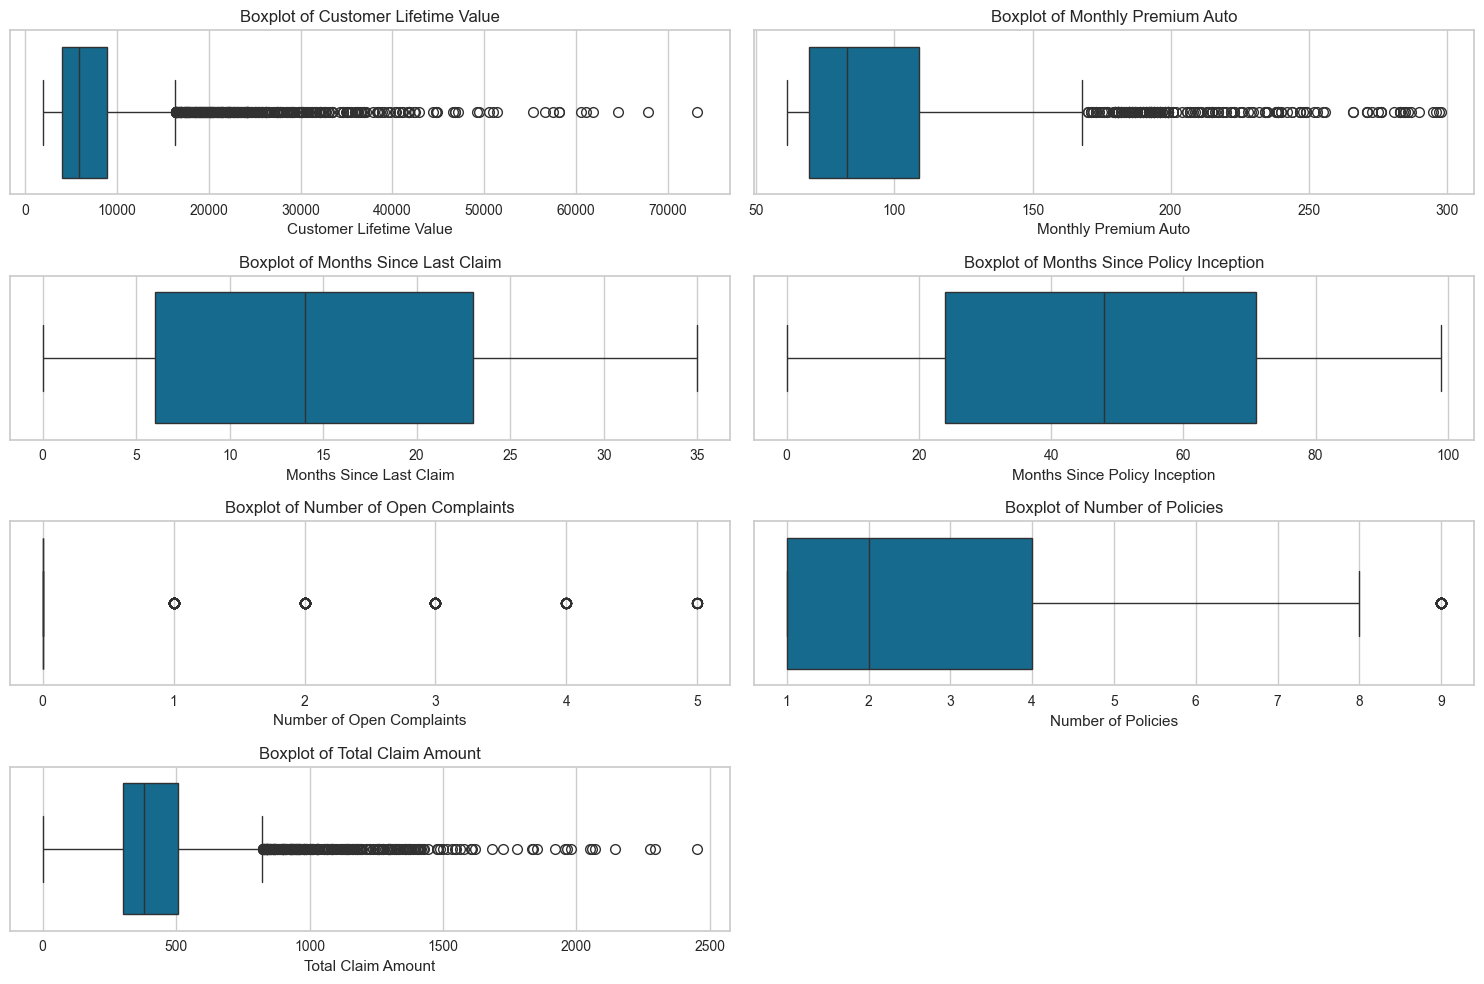

In [34]:
# Boxplot untuk melihat outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Jika dilihat berdasarkan konteks fitur pada dataset, nilai-nilai yang menjadi outlier pada fitur-fitur yang emngandung outlier tersebut sangat masuk akal dan memang bisa terjadi pada dunia nyata. Dengan demikian, outliers akan dibiarkan apa adanya. Selain itu sebagai tambahan saja, saat training dan evaluasi berbagai model kita telah mencoba handle outlier juga, tetapi performanya justru menjadi lebih buruk (lebih bagus jika outlier dibiarkan). Hal ini mengindikasikan bahwa outlier yang ada pada fitur-fitur tersebut memberikan informasi penting dan jika dimodifikasi justru akan menyebabkan kehilangan informasi pada model. Jadi, kami memutuskan untuk membiarkan outlier apa adanya untuk meningkatkan kemampuan generalisasi model terhadpa data di dunia nyata.

## Feature Engineering

In [35]:
# Periksa unique values setiap fitur kategorikal
df_encoded = df.copy()
df_test_classif_encoded = df_test_classif.copy()

for col in df_test_classif_encoded.select_dtypes(include=object).columns:
    print(f"No. of unique values in column {col}: {df_test_classif_encoded[col].nunique()}")
    print(df_test_classif_encoded[col].value_counts(),'\n')

No. of unique values in column State: 5
State
California    618
Oregon        539
Arizona       341
Nevada        171
Washington    158
Name: count, dtype: int64 

No. of unique values in column Coverage: 3
Coverage
Basic       1201
Extended     495
Premium      131
Name: count, dtype: int64 

No. of unique values in column Education: 5
Education
Bachelor                544
College                 544
High School or Below    528
Master                  138
Doctor                   73
Name: count, dtype: int64 

No. of unique values in column Effective To Date: 59
Effective To Date
1/27/11    49
1/28/11    40
1/26/11    40
1/10/11    38
2/5/11     38
1/2/11     37
2/7/11     37
1/20/11    36
2/19/11    36
1/19/11    36
1/29/11    35
1/9/11     34
1/23/11    34
2/4/11     34
2/11/11    34
1/17/11    34
2/18/11    34
2/14/11    33
2/25/11    33
1/6/11     33
1/14/11    33
1/3/11     32
2/21/11    32
2/27/11    32
1/16/11    32
1/4/11     32
2/3/11     31
1/5/11     31
2/13/11    31
2/10/1

Setelah mempertimbangkan ada atau tidaknya logical order berdasarkan konteks dataset dan unique values pada setiap fitur kategorikal, kami memutuskan untuk melakukan:
- Label encoding pada fitur: `Gender`, `Coverage`, `Education`, `Renew Offer Type`, `Vehicle Size`, dan `Effective To Date`
- One-Hot encoding pada fitur: `State`, `EmploymentStatus`, `Location Code`, `Marital Status`, `Policy`, `Policy Type`, `Sales Channel`, dan `Vehicle Class`

In [36]:
# Label encoding
label_encoder = LabelEncoder()

def remove_leading_zeros(date_str):
    month, day, year = date_str.split('/')
    return f"{int(month)}/{int(day)}/{year}"

ordinal_dict = {
    'Gender': {
        'F': 0,
        'M': 1
    },
    'Coverage': {
        'Basic': 0,
        'Extended': 1,
        'Premium': 2
    },
    'Education': {
        'High School or Below': 0,
        'College': 1,
        'Bachelor': 2,
        'Master': 3,
        'Doctor': 4
    },
    'Renew Offer Type': {
        'Offer1': 0,
        'Offer2': 1,
        'Offer3': 2,
        'Offer4': 3
    },
    'Vehicle Size': {
        'Small': 0,
        'Medsize': 1,
        'Large': 2
    },
}

for col in ordinal_dict:
    df_encoded[col] = df[col].map(ordinal_dict[col])
    df_test_classif_encoded[col] = df_test_classif[col].map(ordinal_dict[col])

sorted_dates = sorted(pd.to_datetime(df['Effective To Date'], format='%m/%d/%y').unique())
effective_date_mapping = {remove_leading_zeros(date.strftime('%m/%d/%y')): idx for idx, date in enumerate(sorted_dates)}
df_encoded['Effective To Date'] = df['Effective To Date'].map(effective_date_mapping)

sorted_dates = sorted(pd.to_datetime(df_test_classif['Effective To Date'], format='%m/%d/%y').unique())
effective_date_mapping = {remove_leading_zeros(date.strftime('%m/%d/%y')): idx for idx, date in enumerate(sorted_dates)}
df_test_classif_encoded['Effective To Date'] = df_test_classif['Effective To Date'].map(effective_date_mapping)

In [37]:
# One-Hot Encoding
columns_to_encode = ['State', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy', 'Policy Type', 'Sales Channel', 'Vehicle Class']

df_encoded = pd.get_dummies(df_encoded, columns=columns_to_encode)
bool_columns = df_encoded.select_dtypes(include=['bool']).columns

df_test_classif_encoded = pd.get_dummies(df_test_classif_encoded, columns=columns_to_encode)
bool_columns = df_test_classif_encoded.select_dtypes(include=['bool']).columns

for col in bool_columns:
    df_encoded[col] = df_encoded[col].astype(int)
    df_test_classif_encoded[col] = df_test_classif_encoded[col].astype(int)

In [38]:
# dataset untuk clustering
df_cleaned = df_encoded.copy()

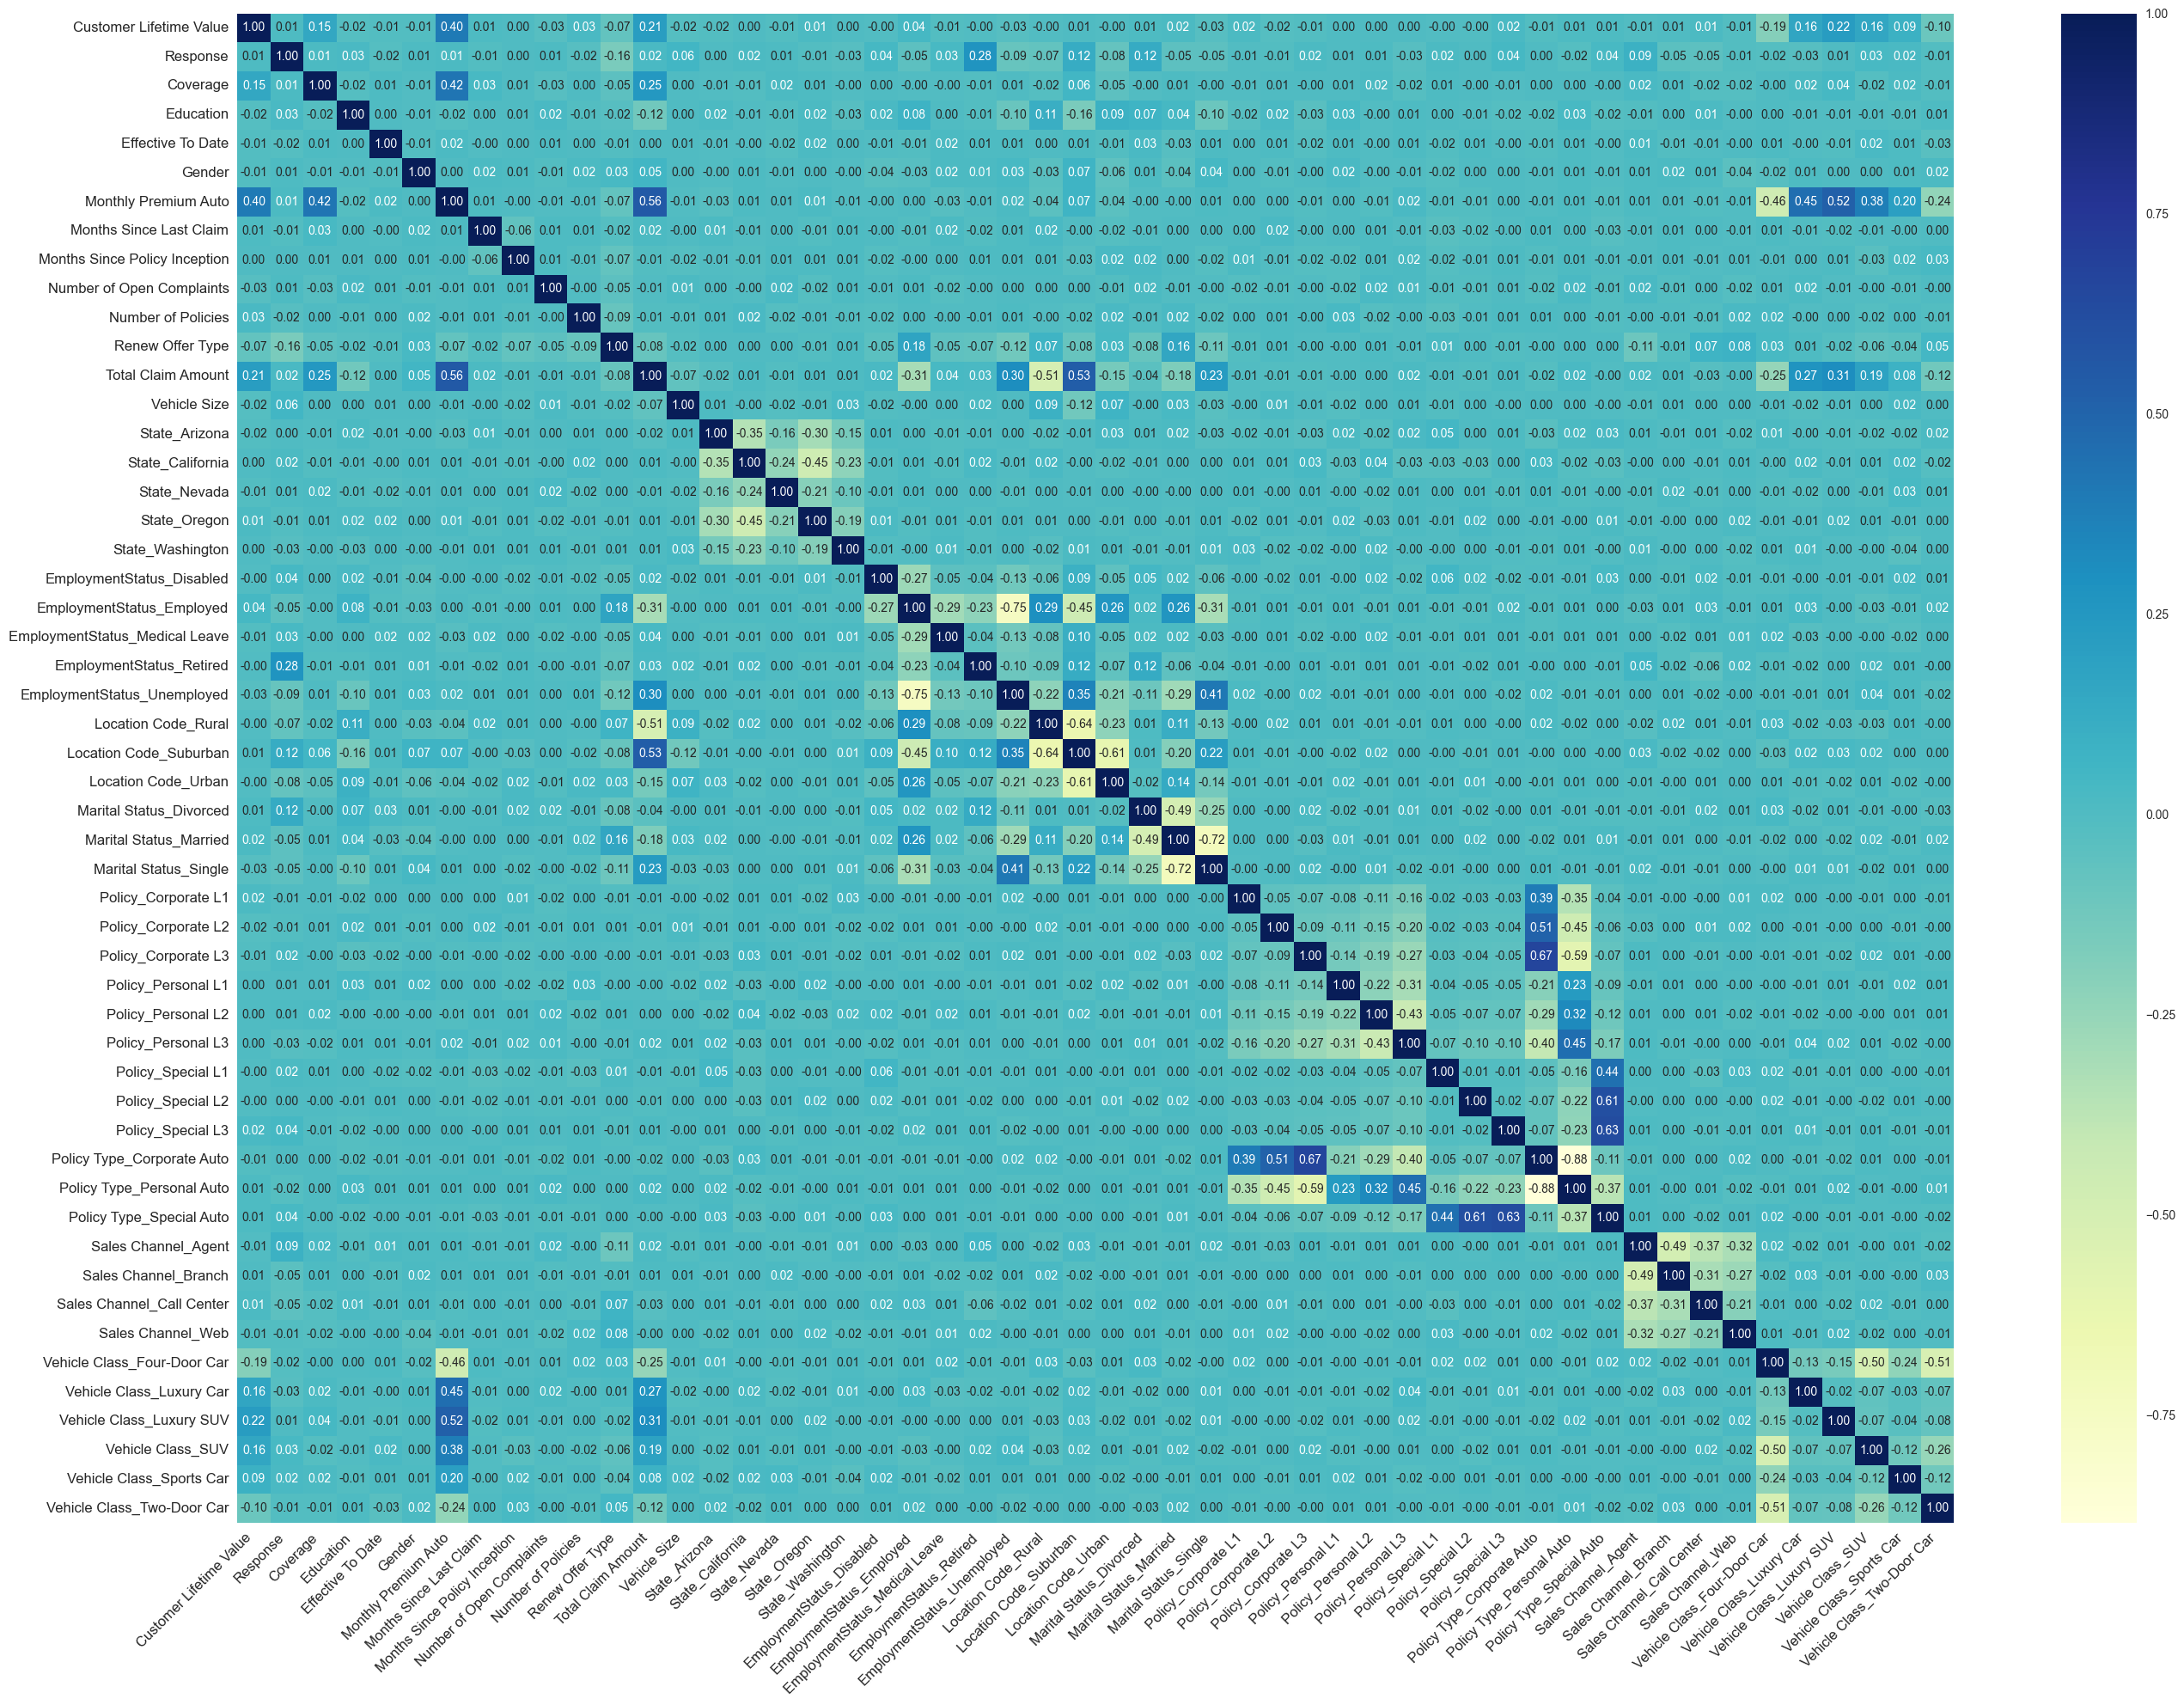

In [39]:
# Lihat korelasi antar fitur
corr = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(28, 20))

dataplot = sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 10})

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [40]:
# Memilih dependent dan independent variables
X = df_encoded.drop(['Response'], axis=1)
y = df_encoded['Response']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (5447, 51)
Shape of y: (5447,)


In [41]:
# Standarisasi fitur numerik
scaler = StandardScaler()

X_scaled = X.copy()
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])
df_test_classif_scaled = df_test_classif_encoded.copy()
df_test_classif_scaled[numerical_columns] = scaler.transform(df_test_classif_encoded[numerical_columns])

X = X_scaled.copy()
df_test_classif = df_test_classif_scaled.copy()

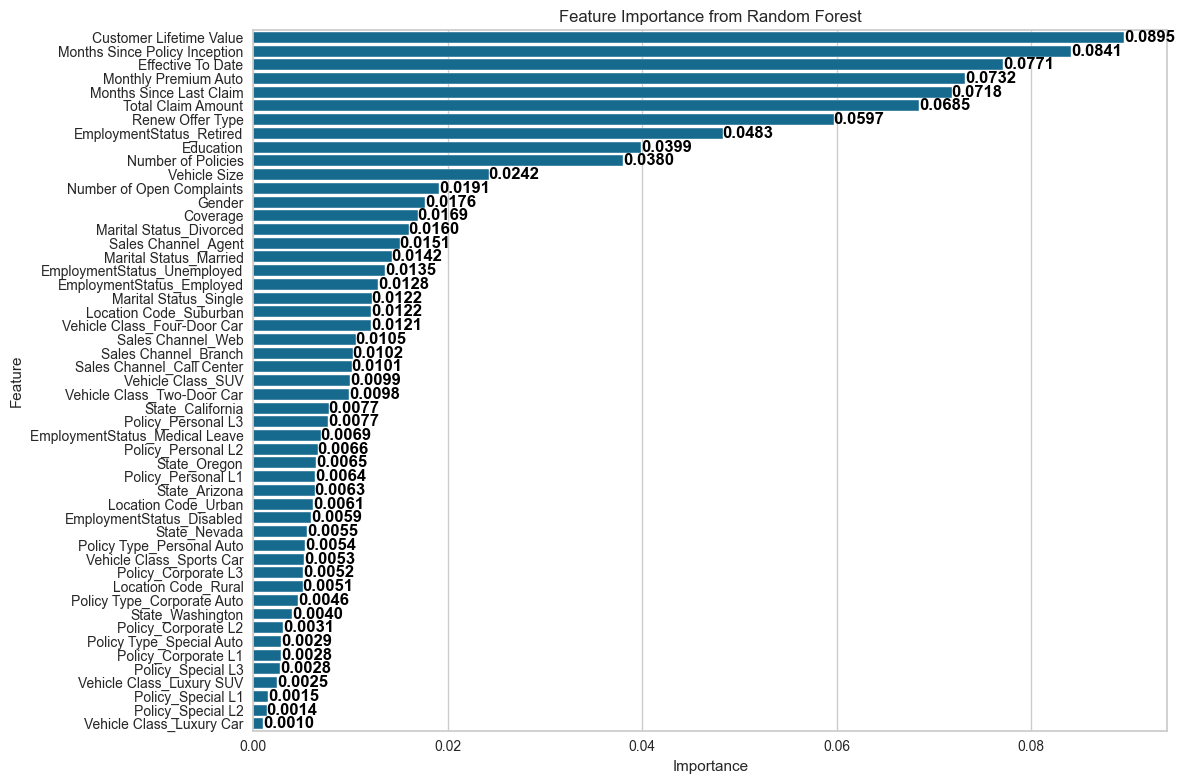

In [42]:
# Feature selection dengan machine learning model RandomForestClassifier
model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    verbose=0
)
model.fit(X, y)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=feature_importance_df, ax=ax)
ax.set_title("Feature Importance from Random Forest")
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")

# Add value labels to the bars
for i, v in enumerate(feature_importance_df['importance']):
    ax.text(v, i, f"{v:.4f}", color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

Akan diambil 25 fitur dengan threshold 0.01.

In [43]:
X_selected_25 = X[feature_importance_df.head(25)['feature'].values]

## Modeling

### Imbalanced

In [123]:
response_counts = y.value_counts()
response_percentages = y.value_counts(normalize=True) * 100

print("Response Class Distribution:")
for class_label, count in response_counts.items():
    percentage = response_percentages[class_label]
    print(f"Class {class_label}: {count} samples ({percentage:.1f}%)")

Response Class Distribution:
Class 0: 4700 samples (86.3%)
Class 1: 747 samples (13.7%)


Setelah coba handle imbalanced dengan resampling (SMOTE, BorderlineSMOTE, SVMSMOTE, Nearmiss-1, Nearmiss-2, Nearmiss-3, dsb.), performa model tetap lebih baik jika dataset dibiarkan imbalanced. Jadi, akan dibiarkan apa sajanya dan dapat mengandalkan metrik yang memang perlu diperhatikan untuk imbalanced dataset. Pada kasus ini, digunakan metrik utama F1 score dengan averaging macro.

### Training Model

Berikut ini adalah hyperparameter terbaik dari model-model yang merupakan hasil tuning yang telah dilakukan pada notebook individu:

In [124]:
classif_models = {
    'rf' : RandomForestClassifier(
        n_estimators=450,
        max_depth=50,
        min_samples_split=10,
        min_samples_leaf=2,
        max_features='log2',
        bootstrap=False,
        class_weight='balanced_subsample',
        random_state=42,
        n_jobs=-1
    ),
    'knn' : KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',
        metric='manhattan',
        n_jobs=-1
    ),
    'xgb' : XGBClassifier(
        n_estimators = 500,
        max_depth = 30,
        learning_rate = 0.1,
        min_child_weight = 2,
        subsample = 0.8,
        colsample_bytree = 0.25,
        gamma = 2,
        reg_alpha = 1,
        reg_lambda = 1,
        random_state = 42,
        eval_metric = 'logloss'
    ),
    'bnb' : BernoulliNB(
        alpha=0.1,
        binarize=0.5,
        fit_prior=True
    ),
    'dt' : DecisionTreeClassifier(
        max_depth=50, 
        min_samples_split=2, 
        min_samples_leaf=1, 
        max_features=0.5, 
        class_weight=None, 
        criterion='entropy', 
        random_state=42
    ),
    'stacking' : StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(
                n_estimators=450,
                max_depth=50,
                min_samples_split=10,
                min_samples_leaf=2,
                max_features='log2',
                bootstrap=False,
                class_weight='balanced_subsample',
                random_state=42,
                n_jobs=-1
            )),
            ('xgb', XGBClassifier(
                n_estimators = 450,
                max_depth = 50,
                learning_rate = 0.1,
                min_child_weight = 2,
                subsample = 0.8,
                colsample_bytree = 0.25,
                gamma = 2,
                reg_alpha = 1,
                reg_lambda = 1,
                random_state = 42,
                eval_metric = 'logloss'
            ))],
        final_estimator=LogisticRegression(),
        cv=5,
        n_jobs=-1
    ),
    'logistic' : LogisticRegression(
        C=10,
        class_weight=None,
        max_iter=100,
        solver='lbfgs',
        random_state=42
    ),
    'mlp' : MLPClassifier(
        activation='tanh', 
        alpha=0.0005717487921177058, 
        batch_size=32,
        hidden_layer_sizes=(255, 70),
        learning_rate_init=0.0008730443503415081, max_iter=300,
        random_state=42
    ),
}

### Evaluate Model

In [125]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
evaluate_score = {}

for train_index, val_index in skf.split(X_selected_25, y):
    X_fold, X_val_fold = X_selected_25.iloc[train_index], X_selected_25.iloc[val_index]
    y_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    for name, model in classif_models.items():
        model.fit(X_fold, y_fold)
        y_pred = model.predict(X_val_fold)

        if name not in evaluate_score:
            evaluate_score[name] = {
                'f1-score': [],
                'precision-score': [],
                'recall-score': []
            }

        evaluate_score[name]['f1-score'].append(f1_score(y_val_fold, y_pred, average='weighted'))
        evaluate_score[name]['precision-score'].append(precision_score(y_val_fold, y_pred, average='weighted'))
        evaluate_score[name]['recall-score'].append(recall_score(y_val_fold, y_pred, average='weighted'))

In [126]:
evaluate_score_avg = {
    model: {metric: sum(scores) / len(scores) for metric, scores in metrics.items()}
    for model, metrics in evaluate_score.items()
}

scoreboard_classif = pd.DataFrame.from_dict(evaluate_score_avg, orient='index').reset_index()
scoreboard_classif = scoreboard_classif.rename(columns={'index': 'Model'})
scoreboard_classif = scoreboard_classif.sort_values(by='f1-score', ascending=False).reset_index(drop=True)

scoreboard_classif

Model  f1-score  precision-score  recall-score
0        rf  0.988773         0.988778      0.988801
1  stacking  0.987961         0.988001      0.988066
2       mlp  0.971025         0.972277      0.970441
3        dt  0.938003         0.945756      0.934641
4       knn  0.924743         0.942550      0.918304
5       xgb  0.891261         0.907904      0.908388
6       bnb  0.839574         0.851305      0.873875
7  logistic  0.837006         0.856474      0.874792

In [187]:
# rf
df_test_classif = df_test_classif[X_selected_25.columns]
predictions = classif_models['rf'].predict(df_test_classif)

submission = pd.DataFrame({'Customer': customer_classif, 'Response': predictions})
submission.to_csv('sample_submission_classif_rf.csv', index=False)

In [188]:
# stacking
df_test_classif = df_test_classif[X_selected_25.columns]
predictions = classif_models['stacking'].predict(df_test_classif)

submission = pd.DataFrame({'Customer': customer_classif, 'Response': predictions})
submission.to_csv('sample_submission_classif_stacking.csv', index=False)

In [189]:
# mlp
df_test_classif = df_test_classif[X_selected_25.columns]
predictions = classif_models['mlp'].predict(df_test_classif)

submission = pd.DataFrame({'Customer': customer_classif, 'Response': predictions})
submission.to_csv('sample_submission_classif_mlp.csv', index=False)

# Regression

## Preprocessing

In [78]:
df, _, df_test_regress = load_datasets()

In [79]:
# Drop identifier (ID)
df = df.drop(columns=['Customer'])
customer_regress = df_test_regress['Customer']
df_test_regress = df_test_regress.drop(columns=['Customer'])

In [80]:
# Describe fitur numerik
df.describe()

Customer Lifetime Value     Response        Income  \
count              5480.000000  5480.000000   4076.000000   
mean               8001.630793     0.142336  50480.955839   
std                6854.186470     0.349426  24296.881547   
min                1898.007675     0.000000  10097.000000   
25%                4016.927113     0.000000  28432.000000   
50%                5801.478197     0.000000  48113.500000   
75%                8947.875574     0.000000  70083.500000   
max               73225.956520     1.000000  99981.000000   

       Monthly Premium Auto  Months Since Last Claim  \
count           5480.000000              5480.000000   
mean              93.479927                15.225365   
std               34.629333                10.029712   
min               61.000000                 0.000000   
25%               69.000000                 6.000000   
50%               83.000000                14.000000   
75%              109.000000                23.000000   
max              298.000000                35.000000   

       Months Since Policy Inception  Number of Open Complaints  \
count                    5480.000000                5480.000000   
mean                       48.119891                   0.371898   
std                        28.020285                   0.894720   
min                         0.000000                   0.000000   
25%                        24.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        71.000000                   0.000000   
max                        99.000000                   5.000000   

       Number of Policies  Total Claim Amount  
count         5480.000000         4563.000000  
mean             2.970255          429.914629  
std              2.400955          283.011212  
min              1.000000            0.423310  
25%              1.000000          267.979586  
50%              2.000000          379.200000  
75%              4.000000          542.400000  
max              9.000000         2452.894264

In [81]:
# Describe fitur kategorikal
df.describe(include='object')

State Coverage Education Effective To Date EmploymentStatus  \
count         5480     4814      5480              5480             5480   
unique           5        3         5                59                5   
top     California    Basic  Bachelor           1/31/11         Employed   
freq          1905     2920      1656               116             3398   

       Gender Location Code Marital Status    Policy Type       Policy  \
count    5480          5480           5480           5480         5480   
unique      2             3              3              3            9   
top         F      Suburban        Married  Personal Auto  Personal L3   
freq     2821          3462           3197           4095         2060   

       Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
count              5480          5480           5480         5480  
unique                4             4              6            3  
top              Offer1         Agent  Four-Door Car      Medsize  
freq               2241          2016           2728         3825

### Missing Values

In [82]:
# Analyze proporsi missing values pada setiap fitur
missing_values_info = []
for col in df:
    missing = df[col].isna().sum()
    missing_values_info.append([col, missing, (missing/len(df))*100])

index_output = list(range(0, len(missing_values_info)))
pd.DataFrame(missing_values_info, columns=['Column', '# Missing','Persentase'], index=index_output).sort_values(by=['Persentase'], ascending=False, ignore_index=True)

Column  # Missing  Persentase
0                          Income       1404   25.620438
1              Total Claim Amount        917   16.733577
2                        Coverage        666   12.153285
3                           State          0    0.000000
4   Months Since Policy Inception          0    0.000000
5                   Vehicle Class          0    0.000000
6                   Sales Channel          0    0.000000
7                Renew Offer Type          0    0.000000
8                          Policy          0    0.000000
9                     Policy Type          0    0.000000
10             Number of Policies          0    0.000000
11      Number of Open Complaints          0    0.000000
12           Monthly Premium Auto          0    0.000000
13        Months Since Last Claim          0    0.000000
14        Customer Lifetime Value          0    0.000000
15                 Marital Status          0    0.000000
16                  Location Code          0    0.000000
17                         Gender          0    0.000000
18               EmploymentStatus          0    0.000000
19              Effective To Date          0    0.000000
20                      Education          0    0.000000
21                       Response          0    0.000000
22                   Vehicle Size          0    0.000000

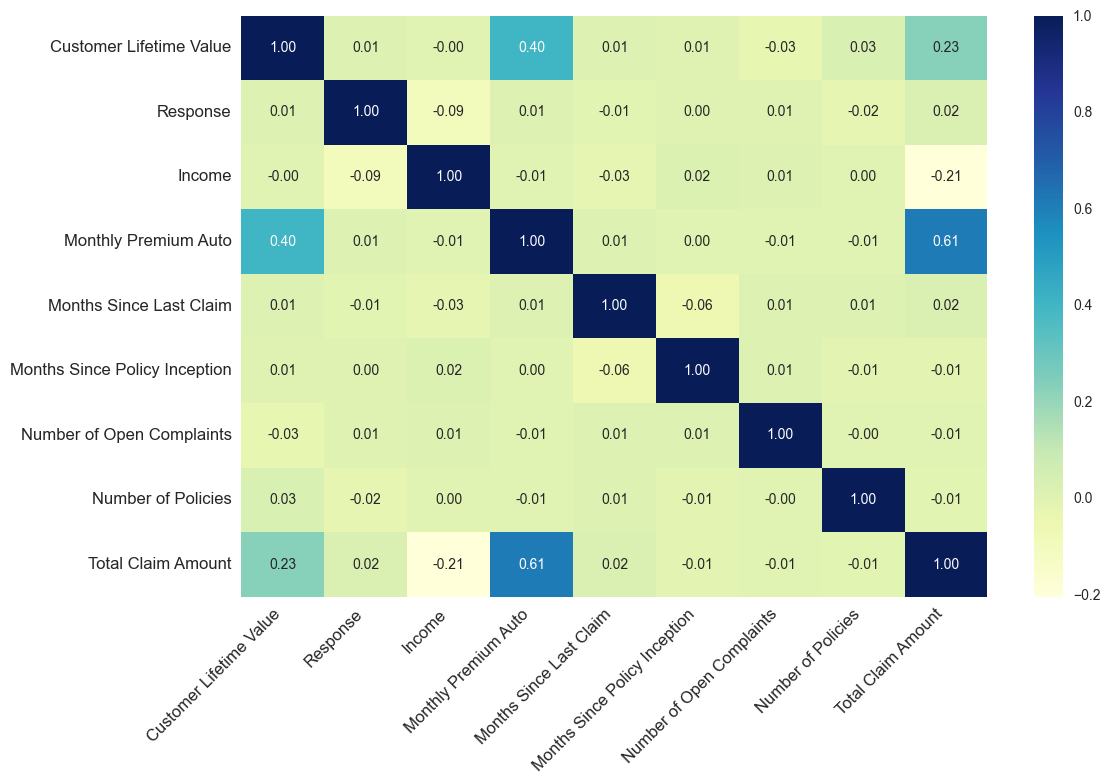

In [83]:
# Melihat korelasi antar fitur untuk pertimbangan handling missing values
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))

dataplot = sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 10})

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

Karena income sudah berkorelasi tinggi dengan `Monthly Premium Auto`, maka kita bisa drop fitur `Income`.  
Selain itu, untuk kasus:
- Klasifikasi: korelasi antara `Response` dengan `Income` = 0.09 (cukup rendah)
- Regresi: korelasi antara `CLV` dengan `Income` = 0

In [84]:
df = df.drop(columns=['Income'])
df_test_regress = df_test_regress.drop(columns=['Income'])

Di sisi lain, untuk Fitur `Total Claim Amount` dan `Coverage`, proporsi missing value masih bisa ditoleransi. Dengan demikian, akan dilakukan imputasi.

In [85]:
df['Total Claim Amount'].describe()

count    4563.000000
mean      429.914629
std       283.011212
min         0.423310
25%       267.979586
50%       379.200000
75%       542.400000
max      2452.894264
Name: Total Claim Amount, dtype: float64

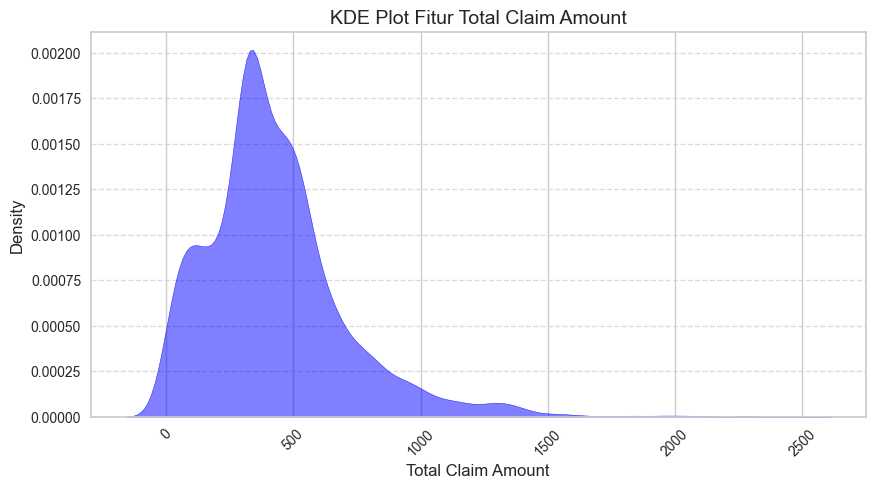

In [86]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Total Claim Amount', fill=True, color='blue', alpha=0.5)
plt.title(f'KDE Plot Fitur Total Claim Amount', fontsize=14)
plt.xlabel('Total Claim Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan informasi di atas (descriptive statistics dan plot), jelas bahwa fitur `Total Claim Amount` tidak terdistribusi secara normal. Dengan demikian imputasi dilakukan menggunakan median.

In [87]:
# Imputasi Fitur Total Claim Amount (numerik) dengan Median
median_imputer = SimpleImputer(strategy='median')
df['Total Claim Amount'] = median_imputer.fit_transform(df[['Total Claim Amount']]).ravel()
median_imputer = SimpleImputer(strategy='median')
df_test_regress['Total Claim Amount'] = median_imputer.fit_transform(df_test_regress[['Total Claim Amount']]).ravel()

Kemudian, karena fitur `Coverage` bersifat kategorikal, maka imputasi dilakukan dengan mode.

In [88]:
# Imputasi Fitur Coverage (kategorikal) dengan Mode
mode_imputer = SimpleImputer(strategy='most_frequent')
df['Coverage'] = mode_imputer.fit_transform(df[['Coverage']]).ravel()
mode_imputer = SimpleImputer(strategy='most_frequent')
df_test_regress['Coverage'] = mode_imputer.fit_transform(df_test_regress[['Coverage']]).ravel()

### Duplication

In [89]:
# Melihat banyaknya duplicated examples
print(f"Banyaknya baris duplikat: {df.duplicated().sum()}")

Banyaknya baris duplikat: 33


Berhubung examples yang hanya merupakan duplikat kemungkinan besar tidak akan memberikan informasi baru, maka akan di-drop.

In [90]:
# Drop examples yang merupakan duplikat
df = df.drop_duplicates()
print(f"Banyaknya baris duplikat: {df.duplicated().sum()}")

Banyaknya baris duplikat: 0


### Outliers

In [91]:
# Simpan fitur numerik
numerical_columns = df.select_dtypes(np.number).columns.tolist()
numerical_columns.remove('Customer Lifetime Value')

In [92]:
# Lihat proporsi outliers
outliers_info = []

Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

for col in df[numerical_columns]:
    outliers = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    outliers_info.append([col, outliers, (outliers/len(df))*100])

index_output = list(range(0, len(outliers_info)))

pd.DataFrame(outliers_info, columns=['Column', '# Outlier', 'Persentase'],index=index_output).sort_values(by=['Persentase'], ascending = False,ignore_index=True)

Column  # Outlier  Persentase
0      Number of Open Complaints       1096   20.121168
1                       Response        747   13.713971
2             Total Claim Amount        375    6.884524
3             Number of Policies        262    4.809987
4           Monthly Premium Auto        260    4.773270
5        Months Since Last Claim          0    0.000000
6  Months Since Policy Inception          0    0.000000

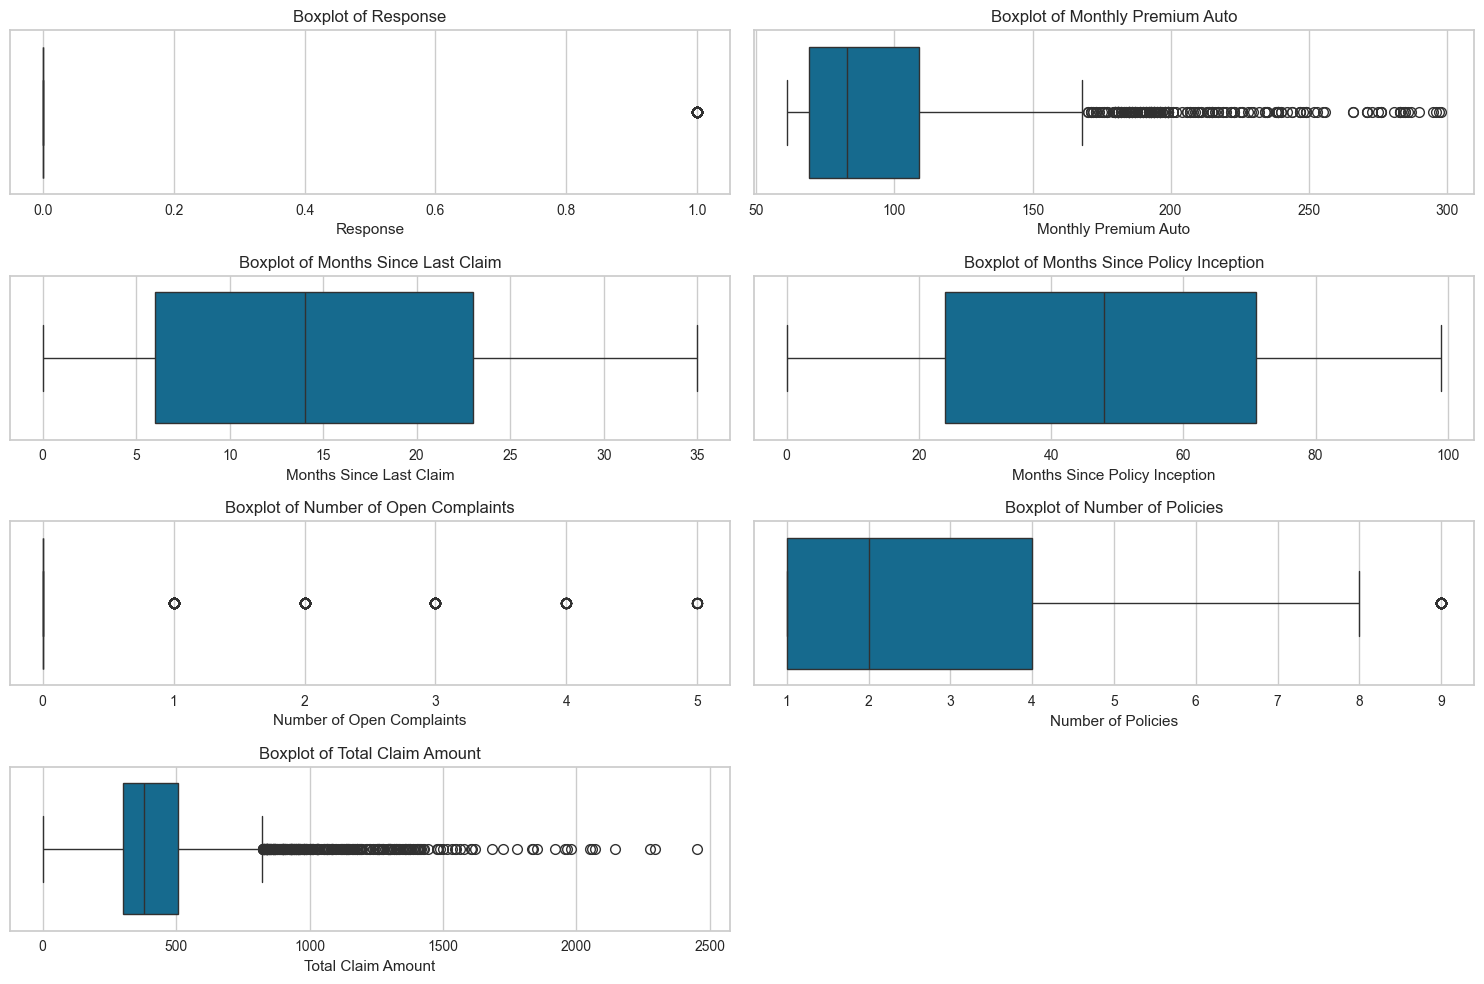

In [93]:
# Boxplot untuk melihat outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Jika dilihat berdasarkan konteks fitur pada dataset, nilai-nilai yang menjadi outlier pada fitur-fitur yang emngandung outlier tersebut sangat masuk akal dan memang bisa terjadi pada dunia nyata. Dengan demikian, outliers akan dibiarkan apa adanya. Selain itu sebagai tambahan saja, saat training dan evaluasi berbagai model kita telah mencoba handle outlier juga, tetapi performanya justru menjadi lebih buruk (lebih bagus jika outlier dibiarkan). Hal ini mengindikasikan bahwa outlier yang ada pada fitur-fitur tersebut memberikan informasi penting dan jika dimodifikasi justru akan menyebabkan kehilangan informasi pada model. Jadi, kami memutuskan untuk membiarkan outlier apa adanya untuk meningkatkan kemampuan generalisasi model terhadpa data di dunia nyata.

## Feature Engineering

In [94]:
# Periksa unique values setiap fitur kategorikal
df_encoded = df.copy()
df_test_regress_encoded = df_test_regress.copy()

for col in df_test_regress_encoded.select_dtypes(include=object).columns:
    print(f"No. of unique values in column {col}: {df_test_regress_encoded[col].nunique()}")
    print(df_test_regress_encoded[col].value_counts(),'\n')

No. of unique values in column State: 5
State
California    627
Oregon        527
Arizona       344
Nevada        169
Washington    160
Name: count, dtype: int64 

No. of unique values in column Coverage: 3
Coverage
Basic       1202
Extended     462
Premium      163
Name: count, dtype: int64 

No. of unique values in column Education: 5
Education
College                 553
Bachelor                548
High School or Below    507
Master                  150
Doctor                   69
Name: count, dtype: int64 

No. of unique values in column Effective To Date: 59
Effective To Date
1/10/11    53
1/19/11    42
1/7/11     40
2/14/11    39
1/21/11    39
1/20/11    38
1/17/11    37
2/12/11    37
2/5/11     36
2/26/11    36
1/24/11    36
1/31/11    35
1/8/11     35
1/3/11     35
2/6/11     35
1/1/11     35
2/28/11    34
1/5/11     34
2/1/11     34
1/29/11    33
1/26/11    33
1/6/11     32
2/11/11    32
1/27/11    32
2/3/11     32
1/15/11    32
2/19/11    32
1/16/11    32
1/11/11    31
2/9/11

Setelah mempertimbangkan ada atau tidaknya logical order berdasarkan konteks dataset dan unique values pada setiap fitur kategorikal, kami memutuskan untuk melakukan:
- Label encoding pada fitur: `Gender`, `Coverage`, `Education`, `Renew Offer Type`, `Vehicle Size`, dan `Effective To Date`
- One-Hot encoding pada fitur: `State`, `EmploymentStatus`, `Location Code`, `Marital Status`, `Policy`, `Policy Type`, `Sales Channel`, dan `Vehicle Class`

In [95]:
# Label encoding
label_encoder = LabelEncoder()

def remove_leading_zeros(date_str):
    month, day, year = date_str.split('/')
    return f"{int(month)}/{int(day)}/{year}"

ordinal_dict = {
    'Gender': {
        'F': 0,
        'M': 1
    },
    'Coverage': {
        'Basic': 0,
        'Extended': 1,
        'Premium': 2
    },
    'Education': {
        'High School or Below': 0,
        'College': 1,
        'Bachelor': 2,
        'Master': 3,
        'Doctor': 4
    },
    'Renew Offer Type': {
        'Offer1': 0,
        'Offer2': 1,
        'Offer3': 2,
        'Offer4': 3
    },
    'Vehicle Size': {
        'Small': 0,
        'Medsize': 1,
        'Large': 2
    },
}

for col in ordinal_dict:
    df_encoded[col] = df[col].map(ordinal_dict[col])
    df_test_regress_encoded[col] = df_test_regress[col].map(ordinal_dict[col])

sorted_dates = sorted(pd.to_datetime(df['Effective To Date'], format='%m/%d/%y').unique())
effective_date_mapping = {remove_leading_zeros(date.strftime('%m/%d/%y')): idx for idx, date in enumerate(sorted_dates)}
df_encoded['Effective To Date'] = df['Effective To Date'].map(effective_date_mapping)

sorted_dates = sorted(pd.to_datetime(df_test_regress['Effective To Date'], format='%m/%d/%y').unique())
effective_date_mapping = {remove_leading_zeros(date.strftime('%m/%d/%y')): idx for idx, date in enumerate(sorted_dates)}
df_test_regress_encoded['Effective To Date'] = df_test_regress['Effective To Date'].map(effective_date_mapping)

In [96]:
# One-Hot Encoding
columns_to_encode = ['State', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy', 'Policy Type', 'Sales Channel', 'Vehicle Class']

df_encoded = pd.get_dummies(df_encoded, columns=columns_to_encode)
bool_columns = df_encoded.select_dtypes(include=['bool']).columns

df_test_regress_encoded = pd.get_dummies(df_test_regress_encoded, columns=columns_to_encode)
bool_columns = df_test_regress_encoded.select_dtypes(include=['bool']).columns

for col in bool_columns:
    df_encoded[col] = df_encoded[col].astype(int)
    df_test_regress_encoded[col] = df_test_regress_encoded[col].astype(int)

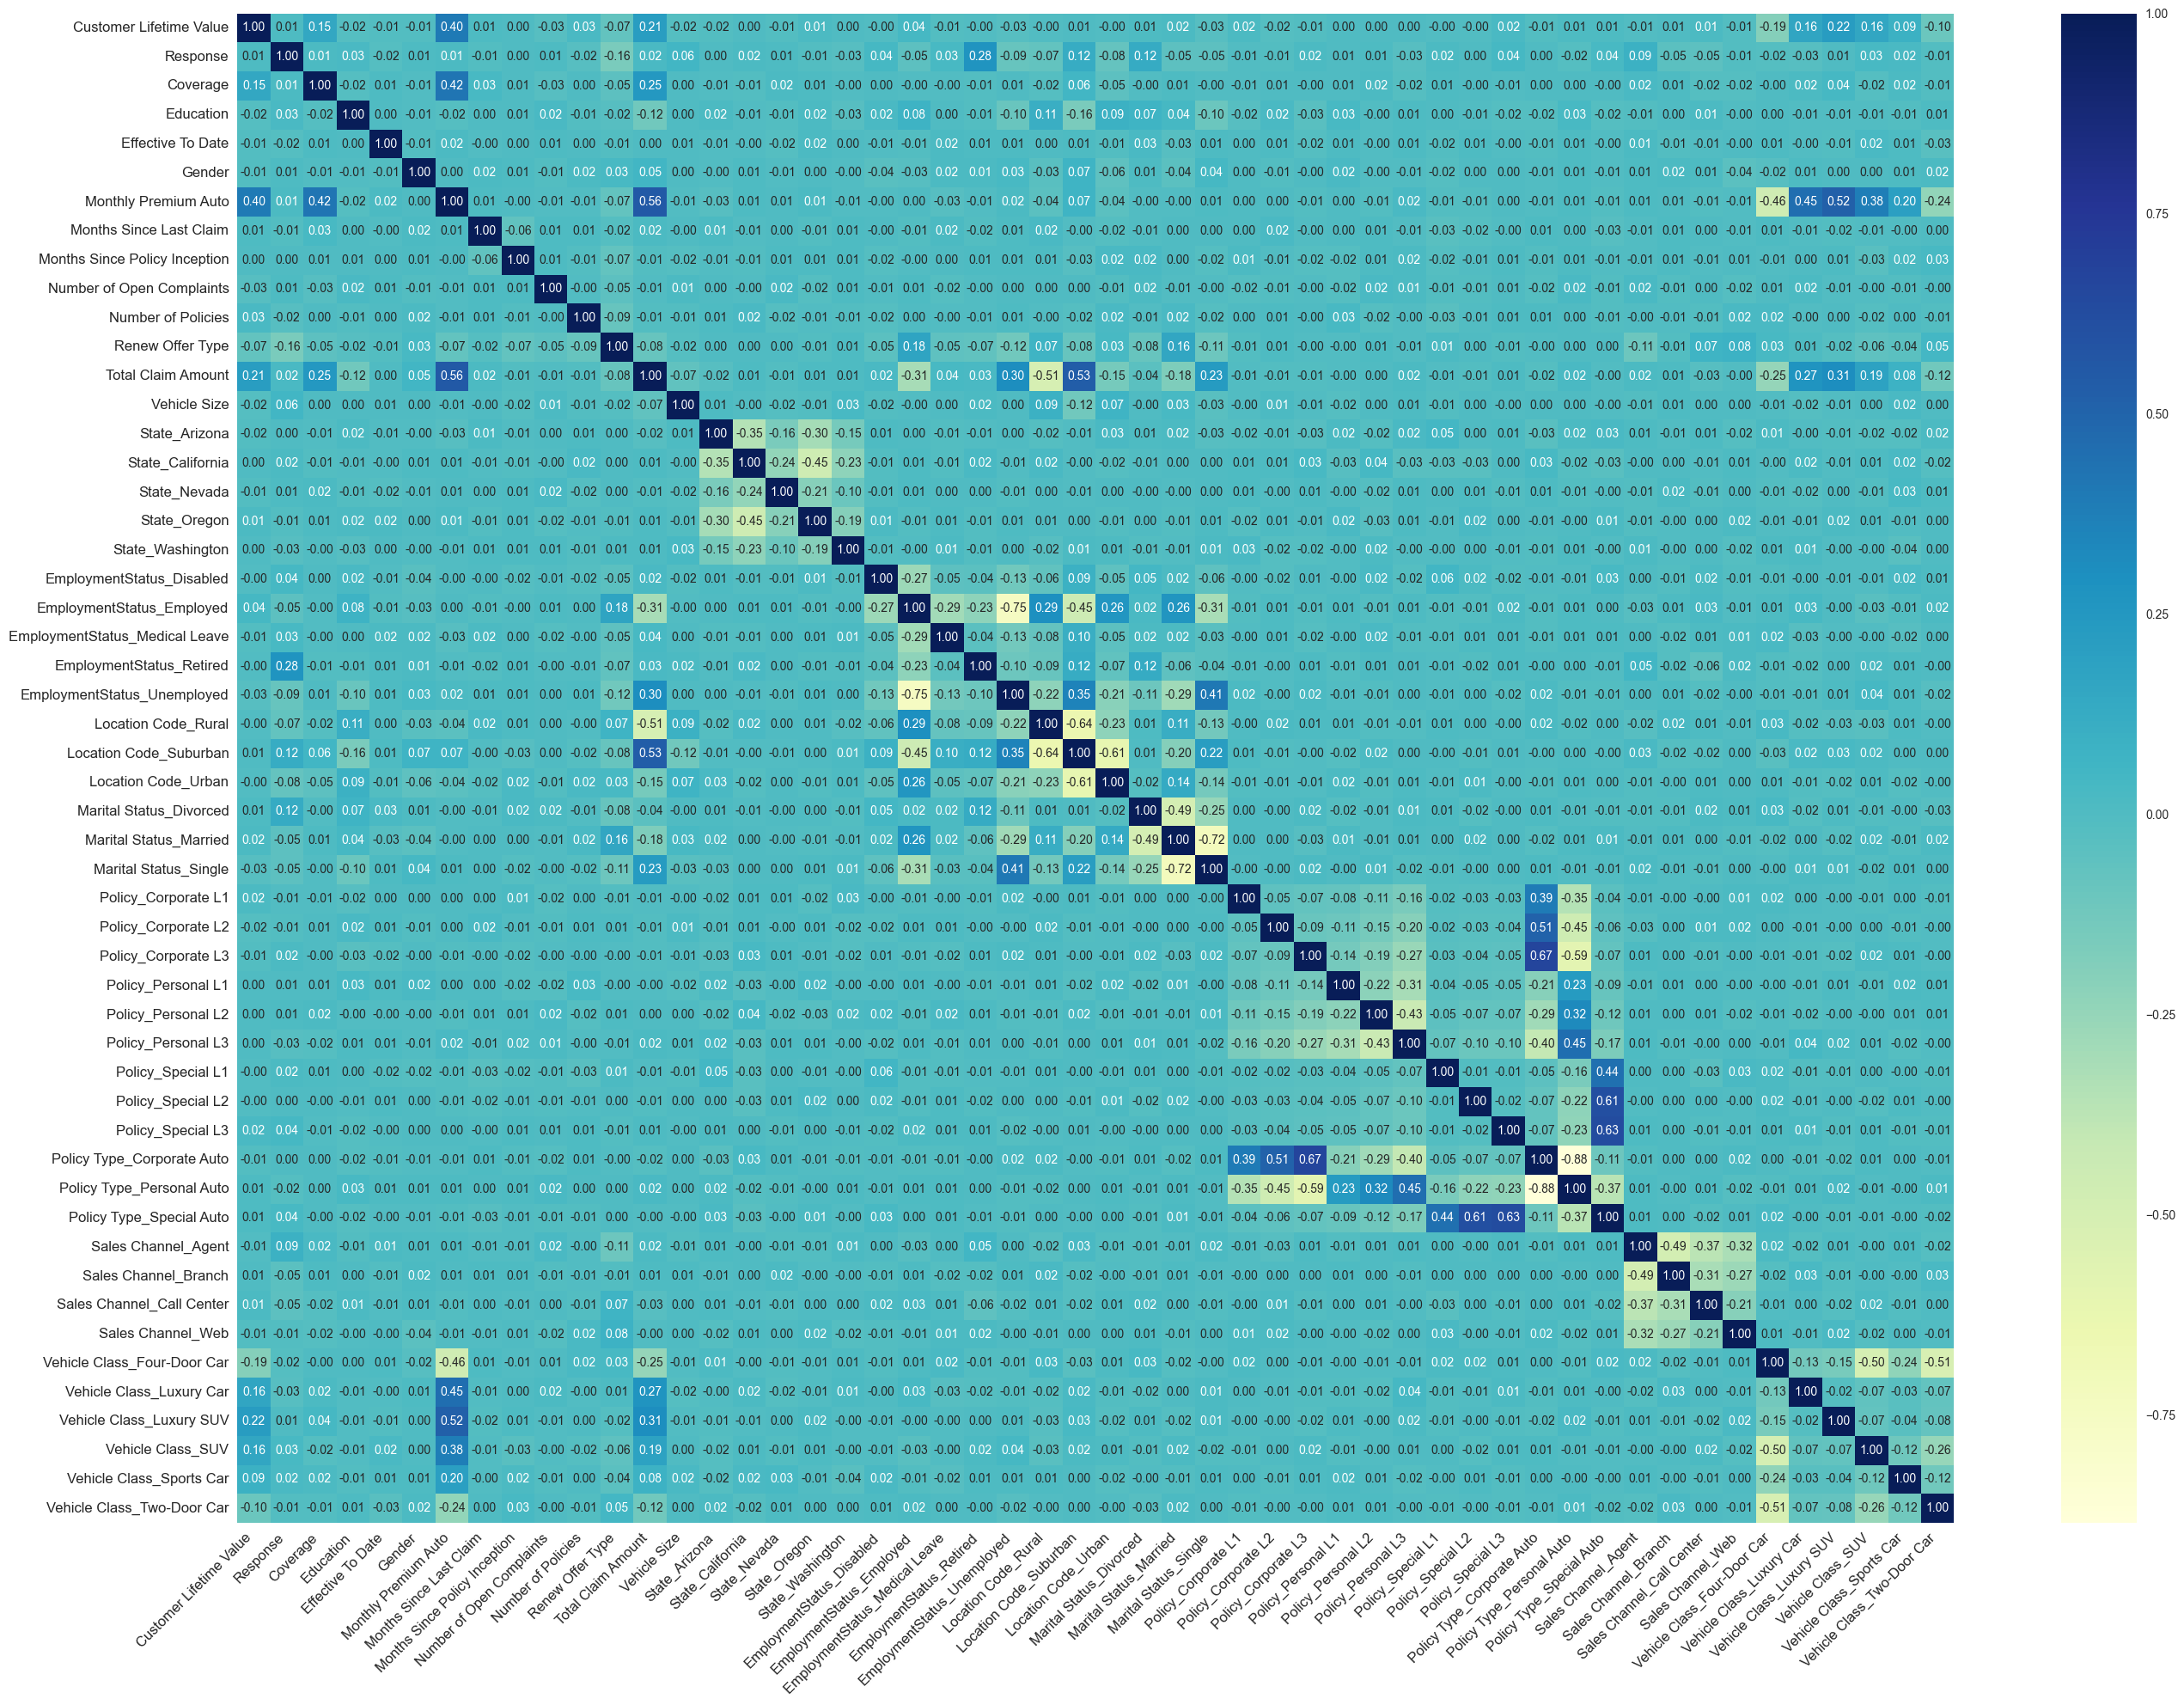

In [97]:
# Lihat korelasi antar fitur
corr = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(28, 20))

dataplot = sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 10})

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [98]:
# Memilih dependent dan independent variables
X = df_encoded.drop(['Customer Lifetime Value'], axis=1)
y = df_encoded['Customer Lifetime Value']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (5447, 51)
Shape of y: (5447,)


In [99]:
# Standarisasi fitur numerik
scaler = StandardScaler()

X_scaled = X.copy()
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])
df_test_regress_scaled = df_test_regress_encoded.copy()
df_test_regress_scaled[numerical_columns] = scaler.transform(df_test_regress_encoded[numerical_columns])

X = X_scaled.copy()
df_test_regress = df_test_regress_scaled.copy()

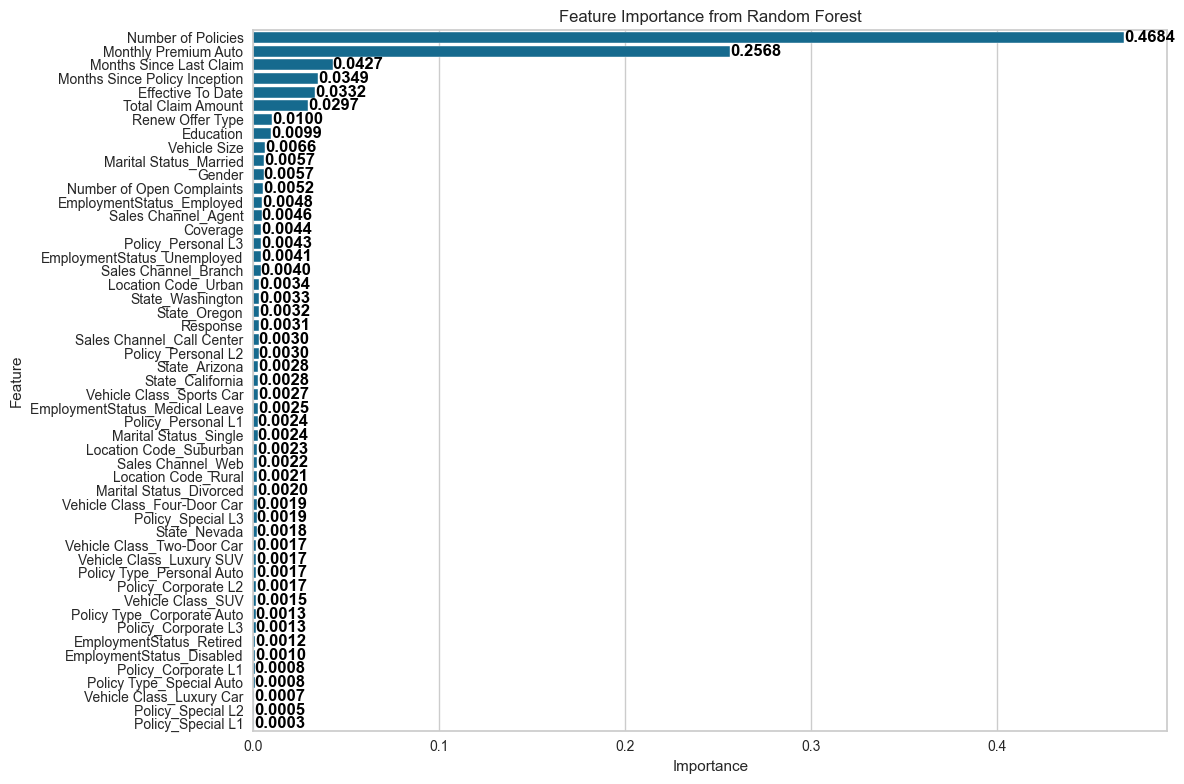

In [100]:
# Feature selection untuk beberapa model
model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
)
model.fit(X, y)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=feature_importance_df, ax=ax)
ax.set_title("Feature Importance from Random Forest")
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")

for i, v in enumerate(feature_importance_df['importance']):
    ax.text(v, i, f"{v:.4f}", color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

Kami mengambil 30 fitur.

In [101]:
X_selected_30 = X[feature_importance_df.head(30)['feature'].values]

In [102]:
# Feature selection untuk beberapa model lainnya
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=15)
X_selected_15 = selector.fit_transform(X, y)
df_test_regress_selected_15 = selector.transform(df_test_regress_encoded)

selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask].tolist()
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})
print("Selected features and their F-scores:")
print(feature_scores.sort_values('Score', ascending=False).head(15))

print("\nShape of X after feature selection:", X.shape)

Selected features and their F-scores:
                        Feature        Score
5          Monthly Premium Auto  1050.657625
47     Vehicle Class_Luxury SUV   276.280113
11           Total Claim Amount   260.263213
45  Vehicle Class_Four-Door Car   210.995495
46     Vehicle Class_Luxury Car   151.565889
48            Vehicle Class_SUV   139.769011
1                      Coverage   127.376699
50   Vehicle Class_Two-Door Car    52.362787
49     Vehicle Class_Sports Car    42.243109
10             Renew Offer Type    27.152562
19    EmploymentStatus_Employed     6.993326
22  EmploymentStatus_Unemployed     5.064573
8     Number of Open Complaints     4.990228
28        Marital Status_Single     4.432506
9            Number of Policies     3.674702

Shape of X after feature selection: (5447, 51)


## Modeling

### Training Model

Berikut ini adalah hyperparameter terbaik dari model-model yang merupakan hasil tuning yang telah dilakukan pada notebook individu:

In [67]:
regress_models = {
    'xgb' : xgb.XGBRegressor(
        learning_rate=0.006528323605514932,
        max_depth=24,
        n_estimators=600,
        min_child_weight=7,
        gamma=0.6277528998572619,
        subsample=0.6008332332699823,
        colsample_bytree=0.8811947381492168,
        reg_alpha=1.3903944538858608,
        reg_lambda=1.461494393149832,
        max_leaves=553,
        max_bin=414,
        scale_pos_weight=4.447507170690486,
        random_state=42,
        n_jobs=-1),
    'mlp' : MLPRegressor(
        hidden_layer_sizes=(80, 256, 112),
        learning_rate_init=0.00024528595387536637,
        alpha=2.3749803745884497e-05,
        batch_size=128,
        activation='relu',
        solver='adam',
        max_iter=1000,
        early_stopping=True,
        random_state=42),
    'rf' : RandomForestRegressor(
        n_estimators=350,
        max_depth=50,
        min_samples_split=10,
        min_samples_leaf=2,
        max_features=0.5,
        bootstrap=True,
        random_state=42,
        n_jobs=-1),
    'rf2' : RandomForestRegressor(
        n_estimators=200,
        random_state=42),
    'linear' : LinearRegression(),
    'ridge' : Ridge(
        alpha=10,
        solver='sag',
        tol=0.1,
        random_state=42),
    'lasso' : Lasso(
        alpha=100,
        max_iter=1000,
        tol=0.0001,
        random_state=42),
}

### Evaluate Model

In [68]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
evaluate_score = {}

for train_index, val_index in kf.split(X_selected_30, y):
    X_fold, X_val_fold = X_selected_30.iloc[train_index], X_selected_30.iloc[val_index]
    y_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    for name, model in regress_models.items():
        model.fit(X_fold, y_fold)
        y_pred = model.predict(X_val_fold)

        if name not in evaluate_score:
            evaluate_score[name] = {
                'MAE': [],
                'MSE': [],
                'RMSE': [],
                'R^2': []
            }

        evaluate_score[name]['MAE'].append(mean_absolute_error(y_val_fold, y_pred))
        evaluate_score[name]['MSE'].append(mean_squared_error(y_val_fold, y_pred))
        evaluate_score[name]['RMSE'].append(root_mean_squared_error(y_val_fold, y_pred))
        evaluate_score[name]['R^2'].append(r2_score(y_val_fold, y_pred))

In [69]:
evaluate_score_avg = {
    model: {metric: sum(scores) / len(scores) for metric, scores in metrics.items()}
    for model, metrics in evaluate_score.items()
}

scoreboard_regress = pd.DataFrame.from_dict(evaluate_score_avg, orient='index').reset_index()
scoreboard_regress = scoreboard_regress.rename(columns={'index': 'Model'})
scoreboard_regress = scoreboard_regress.sort_values(by='R^2', ascending=False).reset_index(drop=True)

scoreboard_regress

Model          MAE           MSE         RMSE       R^2
0      rf  1543.234522  1.389827e+07  3711.891165  0.704046
1     xgb  1541.378735  1.417498e+07  3747.922576  0.698144
2     rf2  1495.279642  1.424241e+07  3756.928417  0.697052
3   lasso  3859.837867  3.926963e+07  6255.040892  0.159509
4  linear  3895.441364  3.950534e+07  6273.025421  0.154709
5     mlp  3954.822931  4.031813e+07  6336.678988  0.137505
6   ridge  4004.816108  4.094282e+07  6389.576384  0.121072

In [ ]:
# Evaluate MLPRegressor jika hanya 15 fitur
mlp_model = MLPRegressor(
    hidden_layer_sizes=(80, 256, 112),
    learning_rate_init=0.00024528595387536637,
    alpha=2.3749803745884497e-05,
    batch_size=128,
    activation='relu',
    solver='adam',
    max_iter=1000,
    early_stopping=True,
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae = []
mse = []
rmse = []
r2 = []

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    mlp_model.fit(X_train, y_train)
    y_pred = mlp_model.predict(X_val)
    mae.append(mean_absolute_error(y_val, y_pred))
    mse.append(mean_squared_error(y_val, y_pred))
    rmse.append(root_mean_squared_error(y_val, y_pred))
    r2.append(r2_score(y_val, y_pred))

print("Model Performance (5-fold cross-validation)")
print(f"MAE     : {np.mean(mae):.4f}")
print(f"MSE     : {np.mean(mse):.4f}")
print(f"RMSE    : {np.mean(rmse):.4f}")
print(f"R²      : {np.mean(r2):.4f}")

Model Performance (5-fold cross-validation)
MAE     : 1876.5218
MSE     : 15404322.4891
RMSE    : 3909.8918
R²      : 0.6715


In [221]:
#RF
X_test = df_test_regress[X_selected_30.columns]
test_predictions = regress_models['rf'].predict(X_test)

submission = pd.DataFrame({
    'Customer': customer_regress,
    'Customer Lifetime Value': test_predictions
})
submission.to_csv('sample_submission_regress_rf.csv', index=False)

In [222]:
#xgb
X_test = df_test_regress[X_selected_30.columns]
test_predictions = regress_models['xgb'].predict(X_test)

submission = pd.DataFrame({
    'Customer': customer_regress,
    'Customer Lifetime Value': test_predictions
})
submission.to_csv('sample_submission_regress_xgb.csv', index=False)

In [223]:
#rf2
X_test = df_test_regress[X_selected_30.columns]
test_predictions = regress_models['rf2'].predict(X_test)

submission = pd.DataFrame({
    'Customer': customer_regress,
    'Customer Lifetime Value': test_predictions
})
submission.to_csv('sample_submission_regress_rf2.csv', index=False)

# Clustering

In [58]:
df_clustering = df_cleaned.copy()
df_clustering

Customer Lifetime Value  Response  Coverage  Education  \
0                29199.810720         0         2          2   
1                 2955.495724         0         0          4   
2                 5032.386371         0         0          2   
3                 4372.194536         0         0          2   
4                 5288.173294         0         0          2   
...                       ...       ...       ...        ...   
5475              8254.698836         0         0          0   
5476              2121.647053         0         0          1   
5477             13778.369330         0         2          3   
5478              2585.560130         0         0          0   
5479              5743.403321         0         0          4   

      Effective To Date  Gender  Monthly Premium Auto  \
0                    42       1                   149   
1                    20       0                    74   
2                     9       1                    63   
3                    22       1                   116   
4                    16       0                    66   
...                 ...     ...                   ...   
5475                  6       0                   115   
5476                 26       1                    62   
5477                  3       0                   113   
5478                 32       0                    64   
5479                 22       1                    73   

      Months Since Last Claim  Months Since Policy Inception  \
0                           4                             76   
1                          15                             78   
2                           4                             43   
3                          23                              0   
4                           8                              3   
...                       ...                            ...   
5475                       19                             60   
5476                       11                             45   
5477                        9                             99   
5478                       12                             57   
5479                        9                             61   

      Number of Open Complaints  Number of Policies  Renew Offer Type  \
0                             0                   2                 0   
1                             0                   1                 2   
2                             0                   7                 0   
3                             0                   1                 2   
4                             0                   3                 1   
...                         ...                 ...               ...   
5475                          0                   9                 0   
5476                          0                   1                 3   
5477                          0                   2                 2   
5478                          0                   1                 1   
5479                          3                   6                 2   

      Total Claim Amount  Vehicle Size  State_Arizona  State_California  \
0             270.373444             1              0                 1   
1             355.200000             1              0                 1   
2             379.200000             0              0                 0   
3             556.800000             1              0                 0   
4             316.800000             1              1                 0   
...                  ...           ...            ...               ...   
5475          379.200000             2              1                 0   
5476          446.400000             0              0                 0   
5477          379.200000             2              0                 0   
5478          379.200000             1              0                 0   
5479          343.278996             1              0                 1   

     

## Standarisasi

In [59]:
num_cols = [
    "Customer Lifetime Value",
    "Response",
    "Monthly Premium Auto",
    "Months Since Last Claim",
    "Months Since Policy Inception",
    "Number of Open Complaints",
    "Number of Policies",
    "Total Claim Amount"
]

In [60]:
cat_cols = [column for column in df_clustering.columns if column not in num_cols]
cat_cols

['Coverage',
 'Education',
 'Effective To Date',
 'Gender',
 'Renew Offer Type',
 'Vehicle Size',
 'State_Arizona',
 'State_California',
 'State_Nevada',
 'State_Oregon',
 'State_Washington',
 'EmploymentStatus_Disabled',
 'EmploymentStatus_Employed',
 'EmploymentStatus_Medical Leave',
 'EmploymentStatus_Retired',
 'EmploymentStatus_Unemployed',
 'Location Code_Rural',
 'Location Code_Suburban',
 'Location Code_Urban',
 'Marital Status_Divorced',
 'Marital Status_Married',
 'Marital Status_Single',
 'Policy_Corporate L1',
 'Policy_Corporate L2',
 'Policy_Corporate L3',
 'Policy_Personal L1',
 'Policy_Personal L2',
 'Policy_Personal L3',
 'Policy_Special L1',
 'Policy_Special L2',
 'Policy_Special L3',
 'Policy Type_Corporate Auto',
 'Policy Type_Personal Auto',
 'Policy Type_Special Auto',
 'Sales Channel_Agent',
 'Sales Channel_Branch',
 'Sales Channel_Call Center',
 'Sales Channel_Web',
 'Vehicle Class_Four-Door Car',
 'Vehicle Class_Luxury Car',
 'Vehicle Class_Luxury SUV',
 'Vehicl

In [61]:
MinMax = MinMaxScaler()
df_clustering[num_cols] = MinMax.fit_transform(df_clustering[num_cols])

df_clustering

Customer Lifetime Value  Response  Coverage  Education  \
0                    0.382764       0.0         2          2   
1                    0.014826       0.0         0          4   
2                    0.043943       0.0         0          2   
3                    0.034687       0.0         0          2   
4                    0.047529       0.0         0          2   
...                       ...       ...       ...        ...   
5475                 0.089119       0.0         0          0   
5476                 0.003135       0.0         0          1   
5477                 0.166560       0.0         2          3   
5478                 0.009639       0.0         0          0   
5479                 0.053911       0.0         0          4   

      Effective To Date  Gender  Monthly Premium Auto  \
0                    42       1              0.371308   
1                    20       0              0.054852   
2                     9       1              0.008439   
3                    22       1              0.232068   
4                    16       0              0.021097   
...                 ...     ...                   ...   
5475                  6       0              0.227848   
5476                 26       1              0.004219   
5477                  3       0              0.219409   
5478                 32       0              0.012658   
5479                 22       1              0.050633   

      Months Since Last Claim  Months Since Policy Inception  \
0                    0.114286                       0.767677   
1                    0.428571                       0.787879   
2                    0.114286                       0.434343   
3                    0.657143                       0.000000   
4                    0.228571                       0.030303   
...                       ...                            ...   
5475                 0.542857                       0.606061   
5476                 0.314286                       0.454545   
5477                 0.257143                       1.000000   
5478                 0.342857                       0.575758   
5479                 0.257143                       0.616162   

      Number of Open Complaints  Number of Policies  Renew Offer Type  \
0                           0.0               0.125                 0   
1                           0.0               0.000                 2   
2                           0.0               0.750                 0   
3                           0.0               0.000                 2   
4                           0.0               0.250                 1   
...                         ...                 ...               ...   
5475                        0.0               1.000                 0   
5476                        0.0               0.000                 3   
5477                        0.0               0.125                 2   
5478                        0.0               0.000                 1   
5479                        0.6               0.625                 2   

      Total Claim Amount  Vehicle Size  State_Arizona  State_California  \
0               0.110073             1              0                 1   
1               0.144661             1              0                 1   
2               0.154447             0              0                 0   
3               0.226864             1              0                 0   
4               0.129003             1              1                 0   
...                  ...           ...            ...               ...   
5475            0.154447             2              1                 0   
5476            0.181848             0              0                 0   
5477            0.154447             2              0                 0   
5478            0.154447             1              0                 0   
5479            0.139800             1              0                 1   

     

## Pemilihan Fitur untuk Clustering

In [62]:
df_new = df_clustering[['Customer Lifetime Value', 'Total Claim Amount', 'Vehicle Class_Luxury Car']]

df_new.head()

Customer Lifetime Value  Total Claim Amount  Vehicle Class_Luxury Car
0                 0.382764            0.110073                         0
1                 0.014826            0.144661                         0
2                 0.043943            0.154447                         0
3                 0.034687            0.226864                         0
4                 0.047529            0.129003                         0

## Menghitung dan Visualisasi Silhouette Coeff

In [63]:
# Menghitung Silhouette Coeff
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
    cluster_labels = clusterer.fit_predict(df_new)
    silhouette_avg = silhouette_score(df_new, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.85724409226497
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.518076665010855
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.5138756891560263
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.41638083706511897


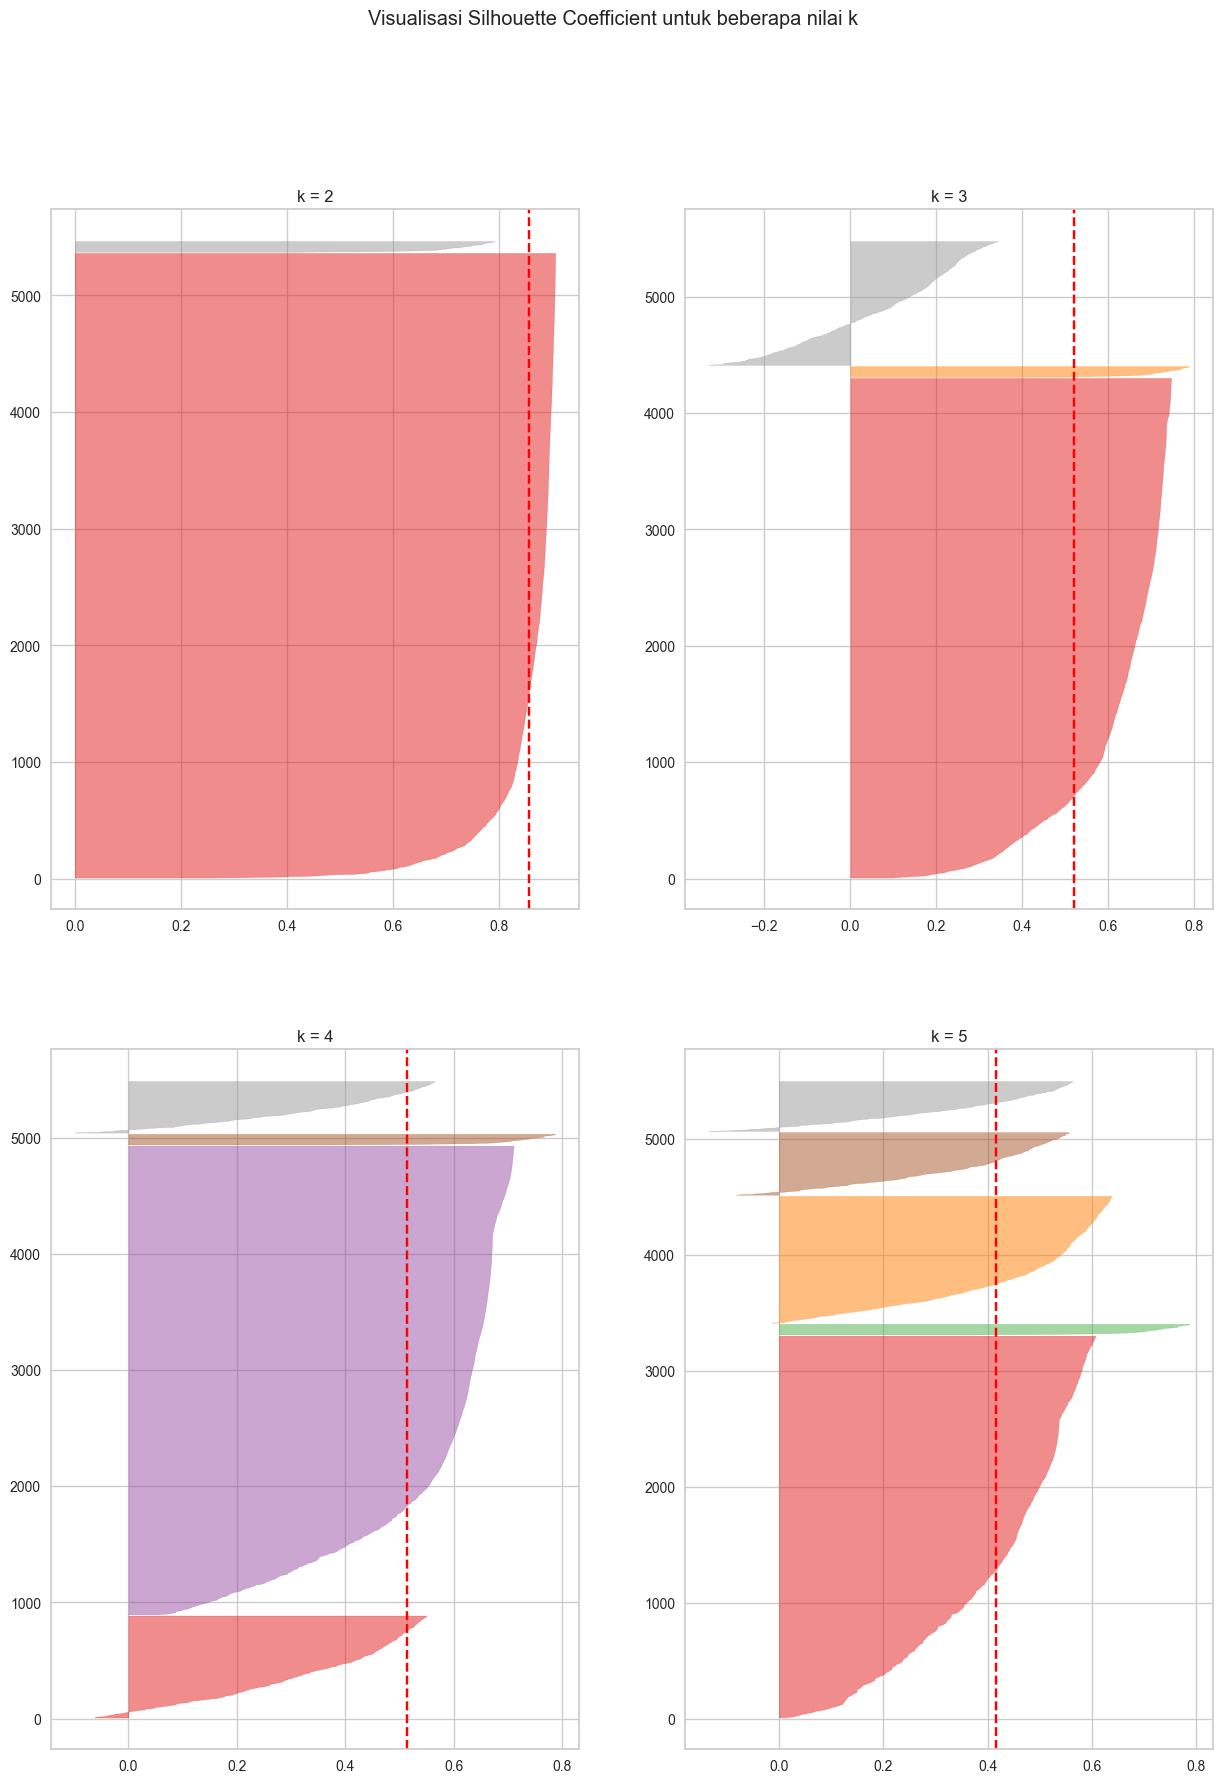

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(15,20))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(df_new)

## Visualisasi Elbow Method

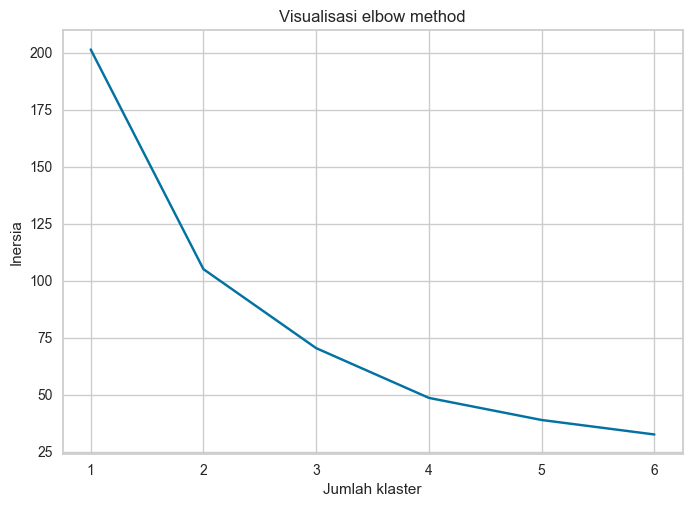

In [65]:
# Memvisualisasikan elbow method
inertia = []
for cluster in range(1, 7):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(df_new)
    inertia.append(km.inertia_)

plt.plot(range(1, 7), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

In [66]:
opt_k = 2

## KMeans Clustering

In [67]:
# Latih model sesuai jumlah klaster optimal
kmeans = KMeans(n_clusters=opt_k, n_init=10)
assignment = kmeans.fit_predict(df_new)

In [68]:
# Append hasil clustering ke dataframe
df_with_clusters = pd.DataFrame(df_new.copy())
df_with_clusters['cluster'] = assignment
df_with_clusters

Customer Lifetime Value  Total Claim Amount  Vehicle Class_Luxury Car  \
0                    0.382764            0.110073                         0   
1                    0.014826            0.144661                         0   
2                    0.043943            0.154447                         0   
3                    0.034687            0.226864                         0   
4                    0.047529            0.129003                         0   
...                       ...                 ...                       ...   
5475                 0.089119            0.154447                         0   
5476                 0.003135            0.181848                         0   
5477                 0.166560            0.154447                         0   
5478                 0.009639            0.154447                         0   
5479                 0.053911            0.139800                         0   

      cluster  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
5475        0  
5476        0  
5477        0  
5478        0  
5479        0  

[5447 rows x 4 columns]

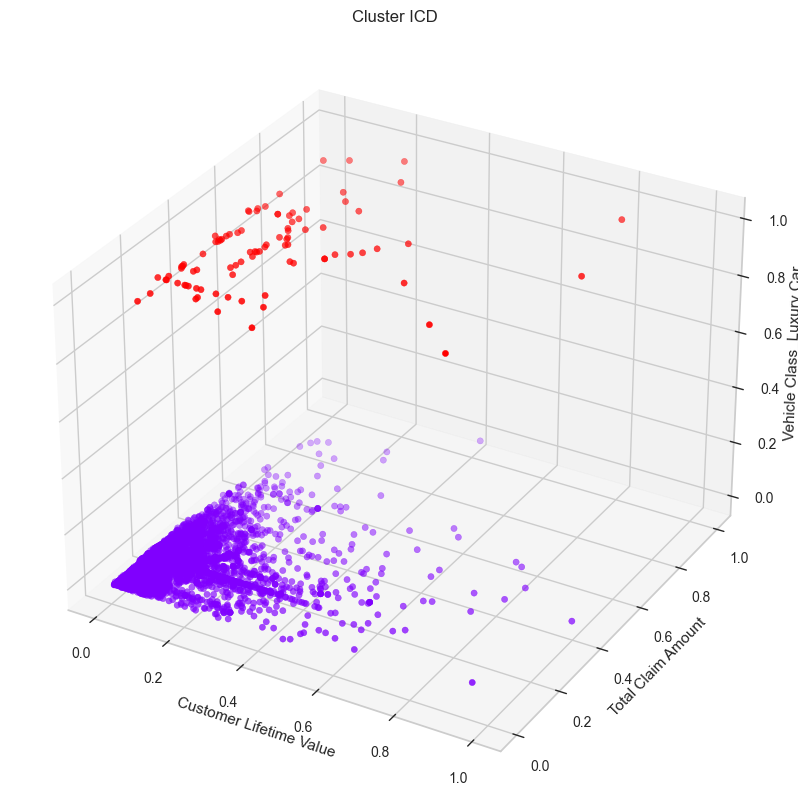

In [69]:
fig = plt.figure(figsize = (13, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['Customer Lifetime Value']
y = df_with_clusters['Total Claim Amount']
z = df_with_clusters['Vehicle Class_Luxury Car']
cluster = df_with_clusters['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Cluster ICD")
plt.grid(False)
ax.set_xlabel('Customer Lifetime Value')
ax.set_ylabel('Total Claim Amount')
ax.set_zlabel('Vehicle Class_Luxury Car')

plt.show()

## Hierarchical Clustering

In [70]:
# Gunakan fungsi ini untuk menampilkan dendogram

# Fungsi untuk menampilkan dendogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

In [71]:
ward_model = AgglomerativeClustering(linkage='ward', distance_threshold=0, n_clusters=None)
ward_model.fit(df_with_clusters)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

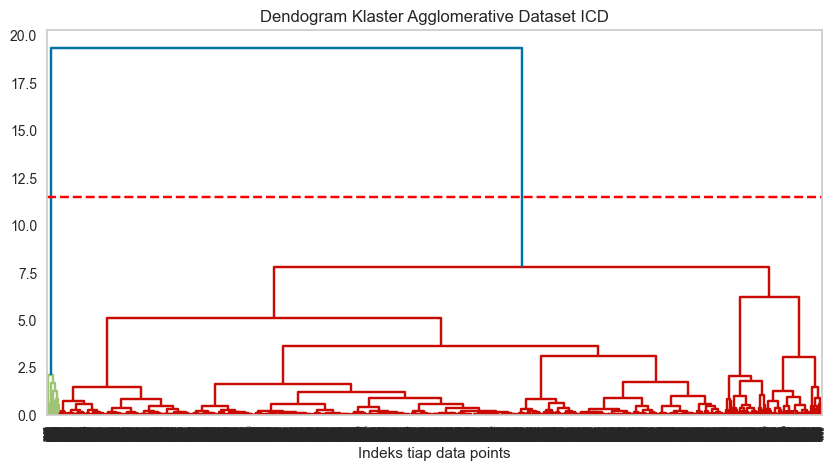

In [72]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(ward_model, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset ICD")
plt.xlabel("Indeks tiap data points")
plt.axhline(y = 11.5, color = 'red', linestyle = 'dashed')
plt.show()

In [73]:
opt_k_ward_model = AgglomerativeClustering(linkage='ward', n_clusters=2)
df_with_clusters['cluster_ward'] = opt_k_ward_model.fit_predict(df_with_clusters)

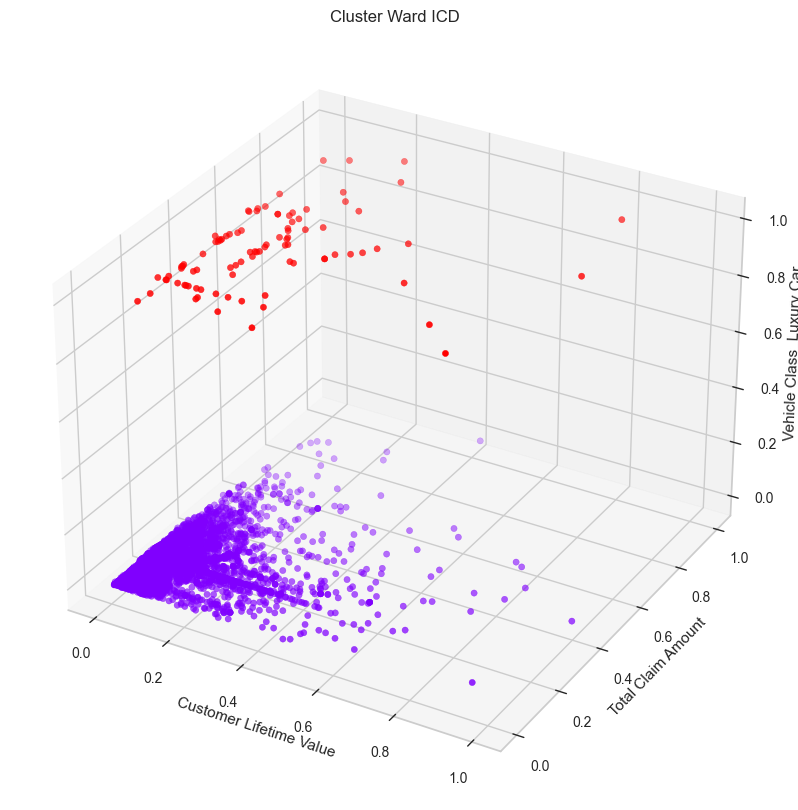

In [74]:
fig = plt.figure(figsize = (13, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['Customer Lifetime Value']
y = df_with_clusters['Total Claim Amount']
z = df_with_clusters['Vehicle Class_Luxury Car']
cluster = df_with_clusters['cluster_ward']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Cluster Ward ICD")
plt.grid(False)
ax.set_xlabel('Customer Lifetime Value')
ax.set_ylabel('Total Claim Amount')
ax.set_zlabel('Vehicle Class_Luxury Car')

plt.show()

## Analisis Hasil Clustering

- Dapat dilihat bahwa terbentuk 2 cluster (ungu dan merah) yang terbagi secara optimal
- Masing-masing cluster merepresentasikan 2 kelompok orang yang berbeda
- Distribusi Data:
    - Cluster Ungu: Jumlah titik data lebih banyak, tersebar di area dengan nilai Customer Lifetime Value dan Total Claim Amount yang lebih rendah.
    - Cluster Merah: Jumlah titik data lebih sedikit, terkonsentrasi di area dengan nilai Customer Lifetime Value dan Total Claim Amount yang lebih tinggi.
- Interpretasi Cluster:
    - Cluster Ungu: Memiliki Customer Lifetime Value dan Total Claim Amount yang rendah. Kemungkinan besar mereka merupakan pelanggan dengan cakupan asuransi dasar atau premi bulanan yang relatif rendah.
    - Cluster Merah: Memiliki Customer Lifetime Value yang tinggi dan mengajukan klaim dengan jumlah yang lebih besar. Kemungkinan besar merupakan pelanggan yang memiliki cakupan asuransi lebih luas atau menggunakan polis dengan premi yang lebih tinggi.

In [75]:
clusterer = KMeans(n_clusters = 2, n_init=10)
cluster_labels = clusterer.fit_predict(df_new)
df_cleaned['Segment K-means'] = cluster_labels

label_map = {0: 'Cluster 1', 1: 'Cluster 2'}
df_cleaned['Segment'] = df_cleaned['Segment K-means'].map(label_map)
df_cleaned.head()

cluster_1 = df_cleaned[df_cleaned['Segment'] == "Cluster 1"]
cluster_2 = df_cleaned[df_cleaned['Segment'] == "Cluster 2"]

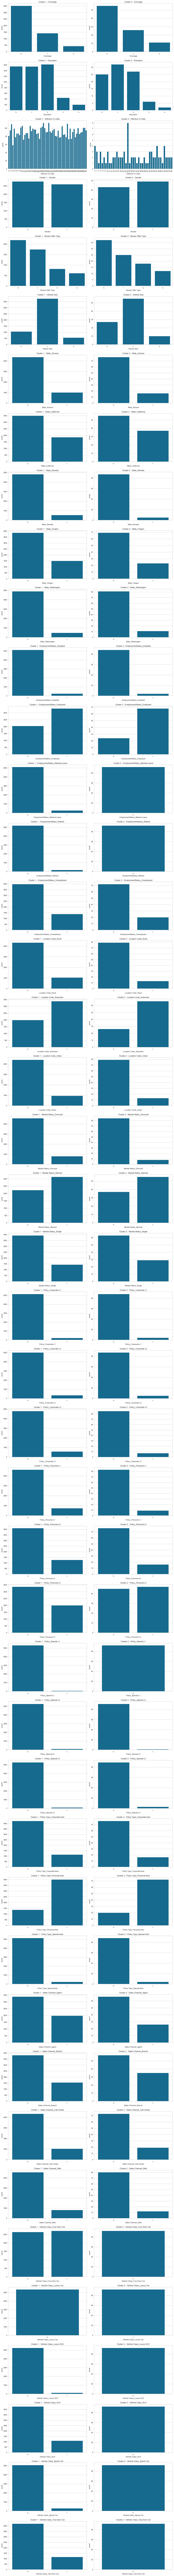

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(cat_cols), 2, figsize=(15, 5*len(cat_cols)))

for i, column in enumerate(cat_cols):
    # Left plot - Cluster 1
    sns.countplot(data=cluster_1, x=column, ax=axes[i, 0])
    axes[i, 0].set_title(f'Cluster 1 - {column}')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # Right plot - Cluster 2
    sns.countplot(data=cluster_2, x=column, ax=axes[i, 1])
    axes[i, 1].set_title(f'Cluster 2 - {column}')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Hasil analisis cluster berdasarkan distribusi fitur kategorikal pasa setiap cluster:  

- Secara umum, hasil clustering ini menunjukkan bahwa pelanggan-pelanggan di cluster 1 memiliki kendaraan yang lebih bervariasi karena separuhnya menggunakan 4 door car (secara umum bukan yang mewah) dan separuh lainnya menggunakan kendaraan lainnya (yang bukan luxury car).
- Di sisi lain, pelanggan-pelanggan di cluster 2 cenderung menggunakan kendaraan yang mewah/luxury dan tidak ada yang menggunakan kendaraan 4 door car (secara umum bukan yang mewah).

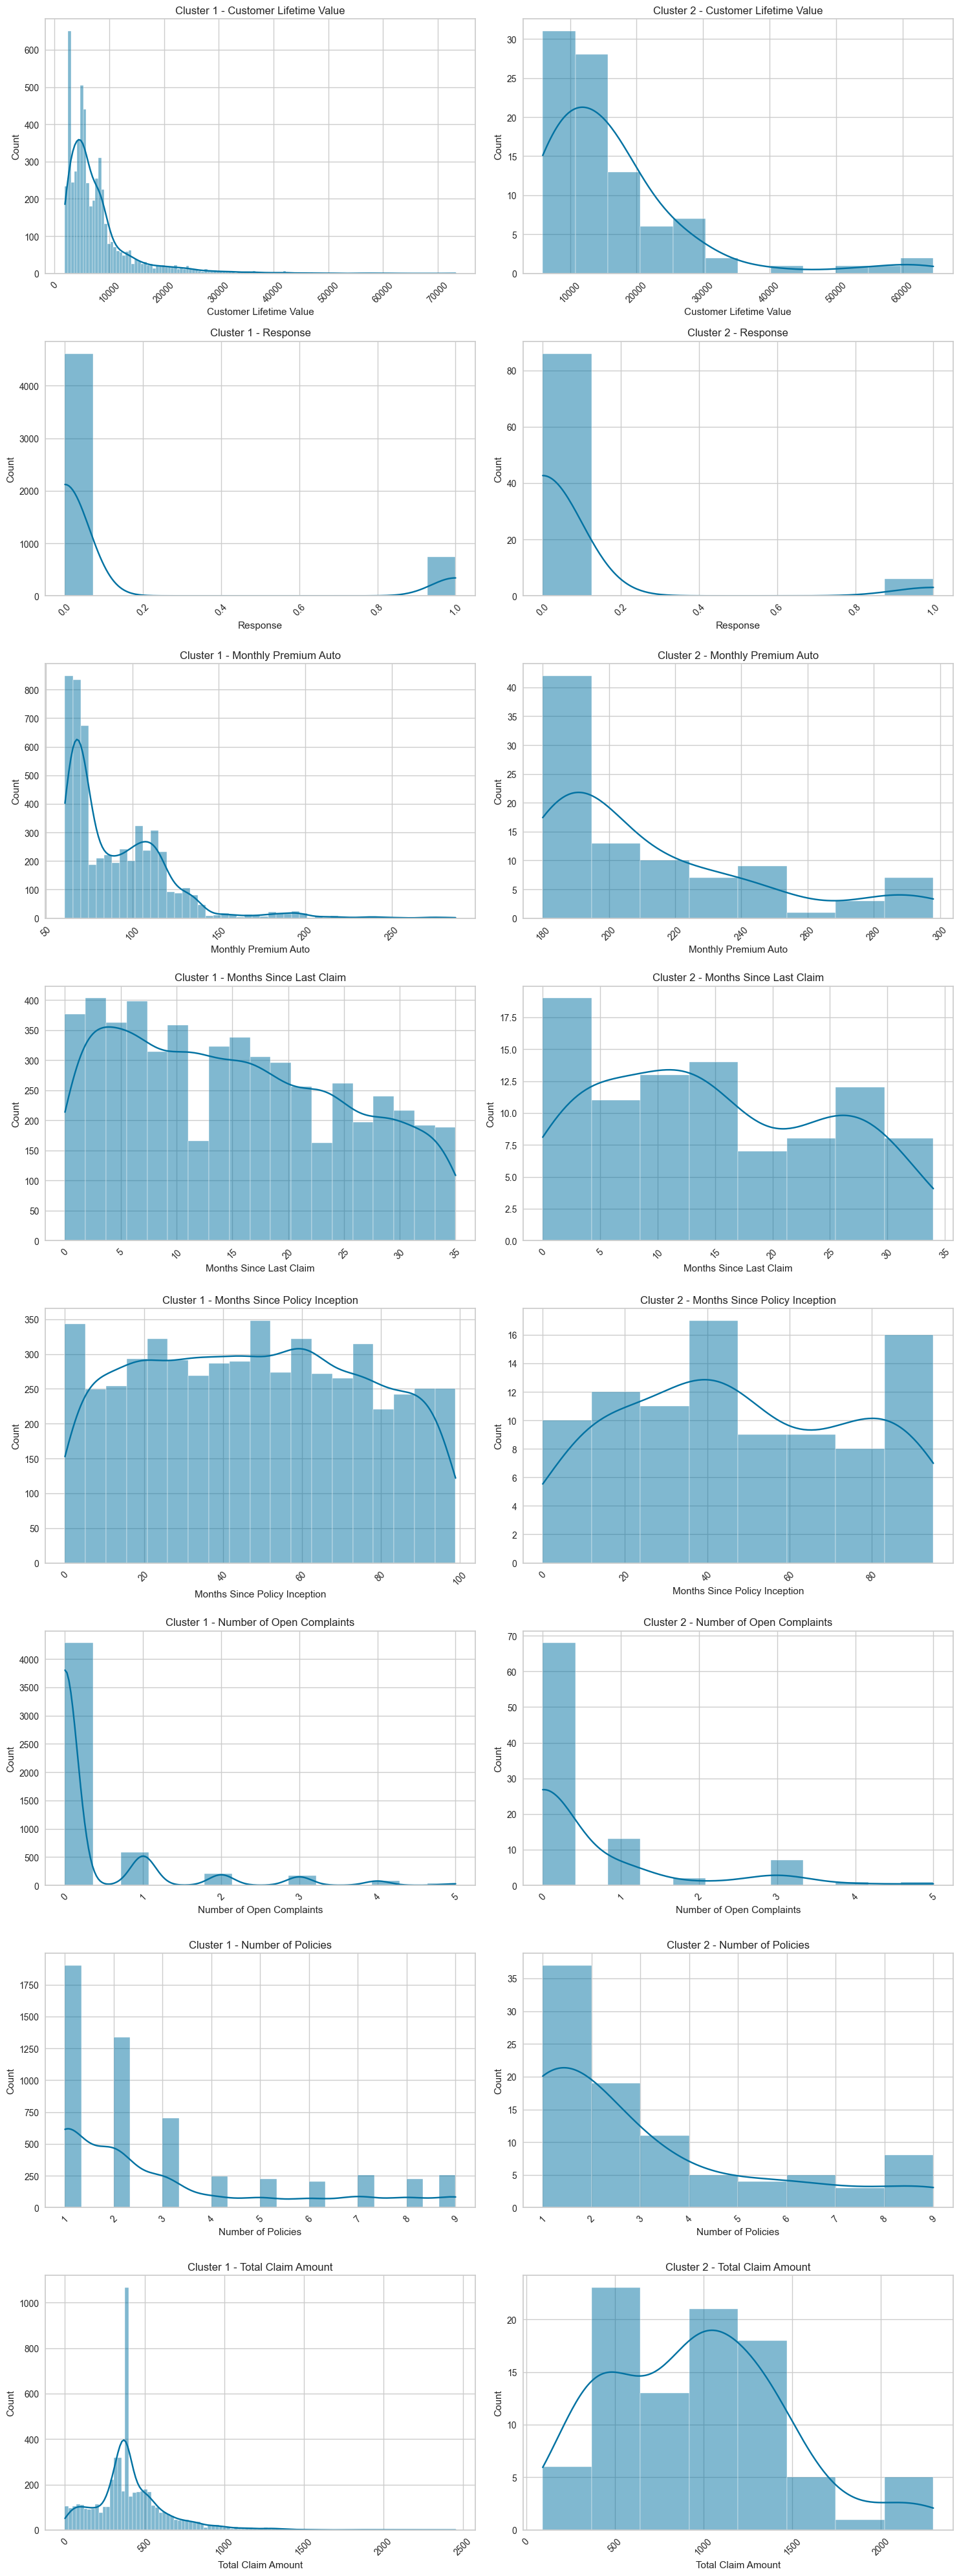

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(num_cols), 2, figsize=(15, 5*len(num_cols)))

for i, column in enumerate(num_cols):
    # Left plot - Cluster 1
    sns.histplot(data=cluster_1, x=column, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Cluster 1 - {column}')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # Right plot - Cluster 2
    sns.histplot(data=cluster_2, x=column, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Cluster 2 - {column}')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Hasil analisis cluster berdasarkan distribusi fitur numerik pada setiap cluster:  

Menurut kami, ada beberapa hal yang cukup mencolok:
- Customer Lifetime Value (CLV):
    - Di cluster 1: mayoritas pelanggan memiliki CLV  < 20.000 yang menunjukkan bahwa pelanggan di cluster ini cenderung memberikan nilai rendah bagi perusahaan
    - Di cluster 2: pelanggan memiliki CLV yang lebih bervariasi dan tinggi yang menunjukkan bahwa pelanggan di cluster ini cenderung memberikan nilai tinggi bagi perusahaan
- Monthly Premium Auto (MPA):
    - Di cluster 1: mayoritas pelanggan memiliki MPA < 100 yang menunjukkan bahwa pelanggan di cluster ini lebih memilih paket dengan biaya bulanan yang lebih terjangkau
    - Di cluster 2: pelanggan memiliki MPA yang lebih bervariasi dan tinggi yang menunjukkan bahwa pelanggan di cluster ini cenderung memilih paket dengan biaya bulanan yang lebih tinggi dan cakupan yang lebih luas